In [1]:
!date

Fri Dec  3 16:58:59 PST 2021


# Celltype assignment
#### Unfiltered data obtained from using kb with multimapping function. Ref genome includes WRE.

___

In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext blackcellmagic

In [3]:
import sys
import anndata
# import scvi

import scanpy as sc
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import pandas as pd

sc.set_figure_params(figsize=(6, 6), frameon=False)
sc.settings.n_jobs=2

In [4]:
# set random seed
np.random.seed(926)

In [5]:
def nd(arr):
    """
    Funciton to transform numpy matrix to nd array.
    """
    return np.asarray(arr).reshape(-1)

___

# Read data from AnnData object

In [6]:
adata = anndata.read_h5ad("../../finchseq_data/all_leiden.h5ad")
adata

AnnData object with n_obs × n_vars = 35804 × 22151
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Create copy of adata to run rank_genes_groups on marker genes only:

In [7]:
adata_test = adata.copy()

___

# DE genes in Leiden clusters

In [8]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='t-test', corr_method="bonferroni", use_raw=False)

Score = z-score underlying the computation of a p-value for each gene for each group

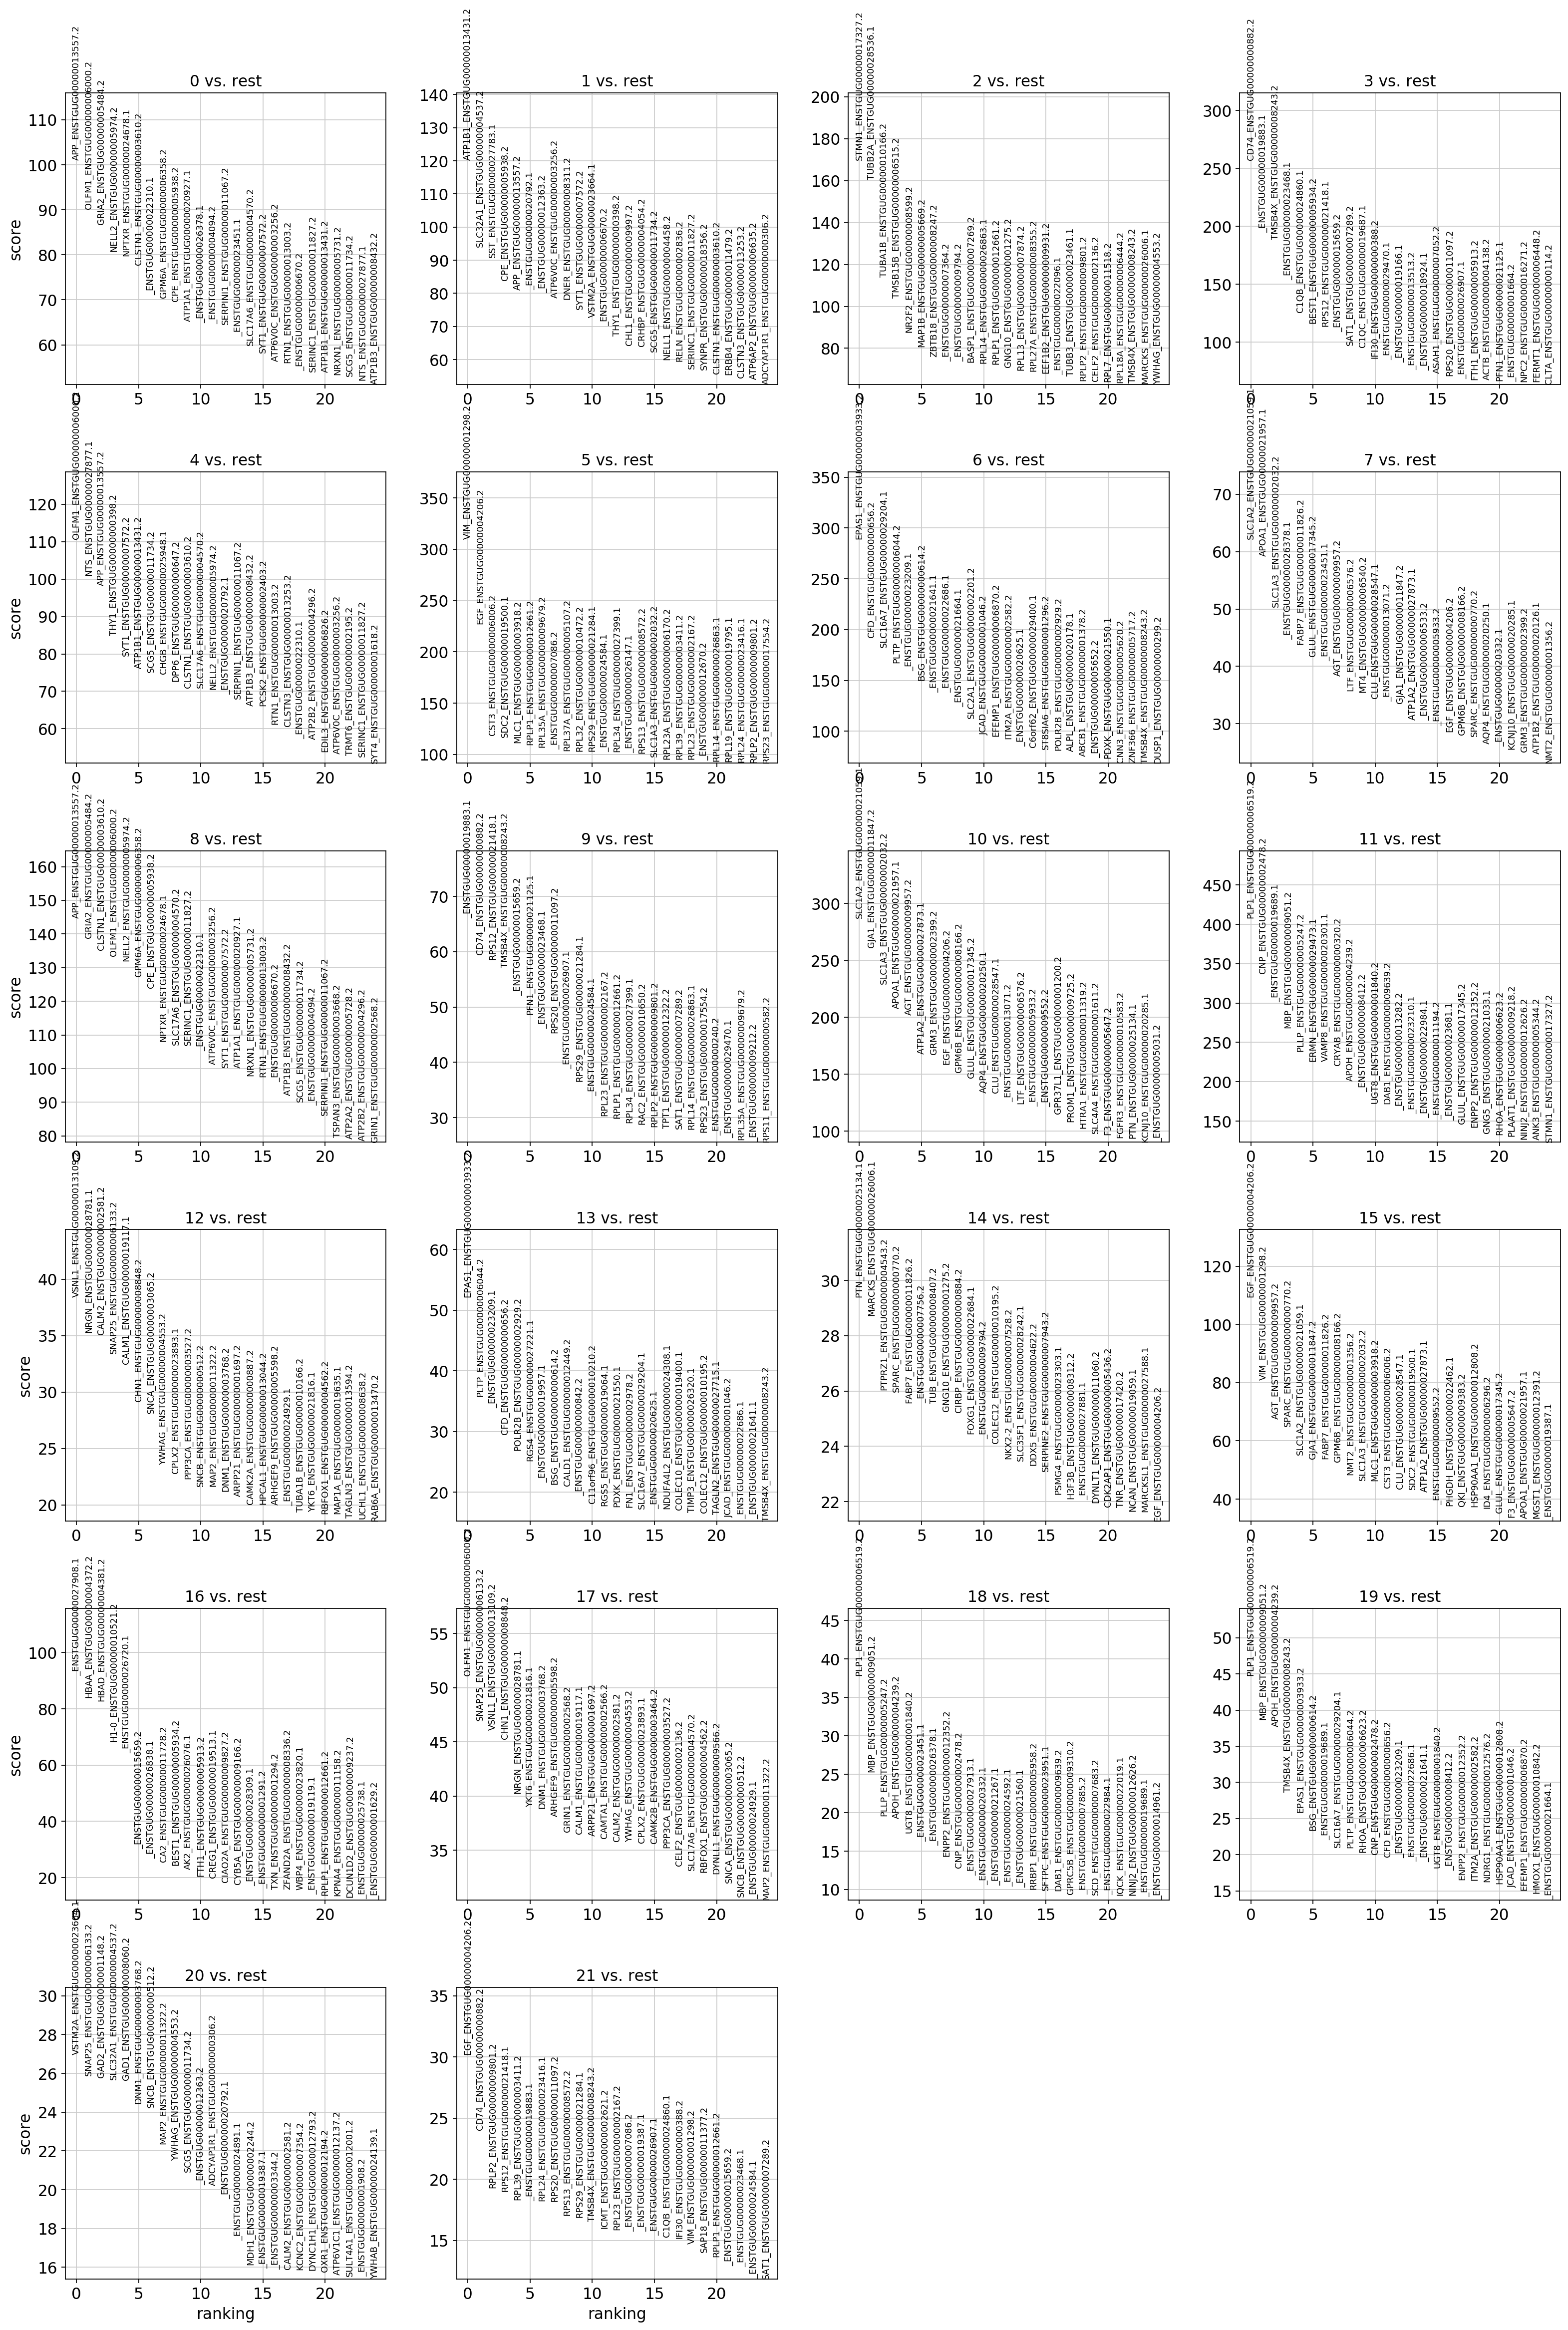

In [9]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, save=True)

Show the 10 top ranked genes per cluster:

In [10]:
leiden_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(25)
leiden_markers

0                               1  \
0        APP_ENSTGUG00000013557.2     ATP1B1_ENSTGUG00000013431.2   
1      OLFM1_ENSTGUG00000006000.2    SLC32A1_ENSTGUG00000004537.2   
2      GRIA2_ENSTGUG00000005484.2        SST_ENSTGUG00000027783.1   
3      NELL2_ENSTGUG00000005974.2        CPE_ENSTGUG00000005938.2   
4      NPTXR_ENSTGUG00000024678.1        APP_ENSTGUG00000013557.2   
5     CLSTN1_ENSTGUG00000003610.2           _ENSTGUG00000020792.1   
6           _ENSTGUG00000022310.1           _ENSTGUG00000012363.2   
7      GPM6A_ENSTGUG00000006358.2    ATP6V0C_ENSTGUG00000003256.2   
8        CPE_ENSTGUG00000005938.2       DNER_ENSTGUG00000008311.2   
9     ATP1A1_ENSTGUG00000020927.1       SYT1_ENSTGUG00000007572.2   
10          _ENSTGUG00000026378.1     VSTM2A_ENSTGUG00000023664.1   
11          _ENSTGUG00000004094.2           _ENSTGUG00000006670.2   
12  SERPINI1_ENSTGUG00000011067.2       THY1_ENSTGUG00000000398.2   
13          _ENSTGUG00000023451.1       CHL1_ENSTGUG00000009997.2   
14   SLC17A6_ENSTGUG00000004570.2      CRHBP_ENSTGUG00000004054.2   
15      SYT1_ENSTGUG00000007572.2       SCG5_ENSTGUG00000011734.2   
16   ATP6V0C_ENSTGUG00000003256.2      NELL1_ENSTGUG00000004458.2   
17      RTN1_ENSTGUG00000013003.2       RELN_ENSTGUG00000002836.2   
18          _ENSTGUG00000006670.2    SERINC1_ENSTGUG00000011827.2   
19   SERINC1_ENSTGUG00000011827.2      SYNPR_ENSTGUG00000018356.2   
20    ATP1B1_ENSTGUG00000013431.2     CLSTN1_ENSTGUG00000003610.2   
21     NRXN1_ENSTGUG00000005731.2      ERBB4_ENSTGUG00000011479.2   
22      SCG5_ENSTGUG00000011734.2     CLSTN3_ENSTGUG00000013253.2   
23       NTS_ENSTGUG00000027877.1    ATP6AP2_ENSTGUG00000006635.2   
24    ATP1B3_ENSTGUG00000008432.2  ADCYAP1R1_ENSTGUG00000000306.2   

                               2                            3  \
0     STMN1_ENSTGUG00000017327.2    CD74_ENSTGUG00000000882.2   
1    TUBB2A_ENSTGUG00000028536.1        _ENSTGUG00000019883.1   
2    TUBA1B_ENSTGUG00000010166.2  TMSB4X_ENSTGUG00000008243.2   
3   TMSB15B_ENSTGUG00000006515.2        _ENSTGUG00000023468.1   
4     NR2F2_ENSTGUG00000008599.2    C1QB_ENSTGUG00000024860.1   
5     MAP1B_ENSTGUG00000005669.2   BEST1_ENSTGUG00000005934.2   
6    ZBTB18_ENSTGUG00000008247.2   RPS12_ENSTGUG00000021418.1   
7          _ENSTGUG00000007364.2        _ENSTGUG00000015659.2   
8          _ENSTGUG00000009794.2    SAT1_ENSTGUG00000007289.2   
9     BASP1_ENSTGUG00000007269.2    C1QC_ENSTGUG00000019687.1   
10    RPL14_ENSTGUG00000026863.1   IFI30_ENSTGUG00000000388.2   
11    RPLP1_ENSTGUG00000012661.2        _ENSTGUG00000029470.1   
12    GNG10_ENSTGUG00000001275.2        _ENSTGUG00000019166.1   
13    RPL13_ENSTGUG00000007874.2        _ENSTGUG00000013513.2   
14   RPL27A_ENSTGUG00000008355.2        _ENSTGUG00000018924.1   
15   EEF1B2_ENSTGUG00000009931.2   ASAH1_ENSTGUG00000007052.2   
16         _ENSTGUG00000022096.1   RPS20_ENSTGUG00000011097.2   
17    TUBB3_ENSTGUG00000023461.1        _ENSTGUG00000026907.1   
18    RPLP2_ENSTGUG00000009801.2    FTH1_ENSTGUG00000005913.2   
19    CELF2_ENSTGUG00000002136.2    ACTB_ENSTGUG00000004138.2   
20     RPL7_ENSTGUG00000011518.2    PFN1_ENSTGUG00000021125.1   
21   RPL18A_ENSTGUG00000006444.2        _ENSTGUG00000001664.2   
22   TMSB4X_ENSTGUG00000008243.2    NPC2_ENSTGUG00000016271.2   
23   MARCKS_ENSTGUG00000026006.1  FERMT1_ENSTGUG00000006448.2   
24    YWHAG_ENSTGUG00000004553.2    CLTA_ENSTGUG00000000114.2   

                                4                            5  \
0      OLFM1_ENSTGUG00000006000.2     VIM_ENSTGUG00000001298.2   
1        NTS_ENSTGUG00000027877.1     EGF_ENSTGUG00000004206.2   
2        APP_ENSTGUG00000013557.2    CST3_ENSTGUG00000006006.2   
3       THY1_ENSTGUG00000000398.2    SDC2_ENSTGUG00000019500.1   
4       SYT1_ENSTGUG00000007572.2    MLC1_ENSTGUG00000003918.2   
5     ATP1B1_ENSTGUG00000013431.2   RPLP1_ENSTGUG00000012661.2   
6       SCG5_ENSTGUG00000011734.2  RPL35A_ENSTGUG00000009679.2   
7       CHGB_ENSTG

In [11]:
# leiden_markers.to_csv("leiden_marker_genes.csv", index=False)

___

# Load previously known marker genes

In [12]:
marker_gene_mat = pd.read_excel('marker_genes.xlsx', sheet_name="matrix_v2")

Find gene ID for each gene:

In [13]:
marker_gene_mat["gene_name_id"] = np.arange(len(marker_gene_mat))

In [14]:
# index counter
i = 0

for gene in marker_gene_mat["Gene"].values:
    gene_name_id = []
    
    if gene.startswith("ENS"):
        gni = adata.var.iloc[np.where(adata.var.index.str.contains(gene))]
    
    else:
        gni = adata.var.iloc[np.where(adata.var.index.str.startswith(gene))]

    if len(gni) > 0:
        gene_name_id = gni.index[0]
    else:
        gene_name_id = np.nan

    marker_gene_mat["gene_name_id"][i] = gene_name_id
    i += 1

/home/lauraluebbert/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/lauraluebbert/bin/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### !!! Check which/if genes were found correctly:

In [15]:
marker_gene_mat[["Gene", "gene_name_id"]]

Gene                    gene_name_id
0              SLC15A2    SLC15A2_ENSTGUG00000026244.1
1                SPEF2      SPEF2_ENSTGUG00000001981.2
2                 PLP1       PLP1_ENSTGUG00000006519.2
3                CSF1R      CSF1R_ENSTGUG00000000965.2
4                 FLI1       FLI1_ENSTGUG00000020175.1
5                 RGS5       RGS5_ENSTGUG00000019064.1
6                  LUM        LUM_ENSTGUG00000008175.2
7                 HBAD       HBAD_ENSTGUG00000004381.2
8              SLC17A6    SLC17A6_ENSTGUG00000004570.2
9                 GAD1       GAD1_ENSTGUG00000008060.2
10                GAD2       GAD2_ENSTGUG00000001148.2
11                SST_        SST_ENSTGUG00000027783.1
12               PVALB      PVALB_ENSTGUG00000010713.2
13               CALB1      CALB1_ENSTGUG00000011825.2
14               CALB2      CALB2_ENSTGUG00000005987.2
15               NR2E1      NR2E1_ENSTGUG00000012147.2
16                 DCX        DCX_ENSTGUG00000006180.2
17             NECTIN3    NECTIN3_ENSTGUG00000013600.2
18                TBR1       TBR1_ENSTGUG00000006709.2
19               FABP7      FABP7_ENSTGUG00000011826.2
20              NOTCH2     NOTCH2_ENSTGUG00000017231.2
21               UTS2B      UTS2B_ENSTGUG00000009278.2
22              HPCAL1     HPCAL1_ENSTGUG00000013044.2
23                 DCN        DCN_ENSTGUG00000008178.2
24                 NTS        NTS_ENSTGUG00000027877.1
25             ALDH1A2    ALDH1A2_ENSTGUG00000006178.2
26               FNDC9      FNDC9_ENSTGUG00000000654.2
27              COL6A3     COL6A3_ENSTGUG00000003667.2
28              NFATC1     NFATC1_ENSTGUG00000006621.2
29            ADAMTS18   ADAMTS18_ENSTGUG00000009163.2
30                 VIM        VIM_ENSTGUG00000001298.2
31                BDNF       BDNF_ENSTGUG00000004743.2
32               FOSL2      FOSL2_ENSTGUG00000024611.1
33              HOMER1     HOMER1_ENSTGUG00000003711.2
34                 ARC        ARC_ENSTGUG00000012727.2
35  ENSTGUG00000007756           _ENSTGUG00000007756.2
36                SOX4                             NaN
37             or107-1                             NaN
38              EJZER1                             NaN
39               AR46s                             NaN
40                 DDC        DDC_ENSTGUG00000007930.2
41                 DBH        DBH_ENSTGUG00000005640.2
42               CASP3      CASP3_ENSTGUG00000006682.2
43               AIFM1      AIFM1_ENSTGUG00000005167.2
44                MCU_        MCU_ENSTGUG00000004428.2
45           TNFAIP8L3  TNFAIP8L3_ENSTGUG00000028388.1
46                EGR1       EGR1_ENSTGUG00000000003.2
47                E2F1       E2F1_ENSTGUG00000028557.1
48                MCM2       MCM2_ENSTGUG00000008031.2
49                MCM3       MCM3_ENSTGUG00000013275.2
50                MCM4       MCM4_ENSTGUG00000010897.2
51                MCM5       MCM5_ENSTGUG00000010831.2
52                MCM6       MCM6_ENSTGUG00000011790.2
53                PCNA       PCNA_ENSTGUG00000004036.2
54  ENSTGUG00000021193           _ENSTGUG00000021193.1

Notes on the marker genes:  
FNDC9 is a synonym for FNTM2 (HVC-X marker).  
PDGFRA (ENSTGUG00000007756.2) not annotated.  
or107-1 is a synonym for ZF1A (neither, not even ensembl ID, can be found in ref).  
Ki67 (ENSTGUG00000021193) not annotated. 

SOX4 and PDGFRA not in reference genome gtf. This is weird because Colquitt et al report using them as a markers and they use the same ref. genome.

ZF1A, EJZER1, and AR46s also not in ref gtf (not used in Colquitt paper).

In [16]:
# Drop rows with genes not found in dataset
marker_gene_mat = marker_gene_mat.dropna(axis=0)

# Drop columns of celltypes containing only 0s
marker_gene_mat = marker_gene_mat.loc[:, (marker_gene_mat != 0).any(axis=0)]
 
#Set gene_name_id as index and drop "gene" coplumn
marker_gene_mat = marker_gene_mat.set_index("gene_name_id")
marker_gene_mat = marker_gene_mat.drop("Gene", axis=1)

marker_gene_mat

neuron  glia  vascular  astrocytes  \
gene_name_id                                                         
SLC15A2_ENSTGUG00000026244.1         0     1         0           1   
SPEF2_ENSTGUG00000001981.2           0     1         0           0   
PLP1_ENSTGUG00000006519.2            0     1         0           0   
CSF1R_ENSTGUG00000000965.2           0     1         0           0   
FLI1_ENSTGUG00000020175.1            0     0         1           0   
RGS5_ENSTGUG00000019064.1            0     0         1           0   
LUM_ENSTGUG00000008175.2             0     0         0           0   
HBAD_ENSTGUG00000004381.2            0     0         1           0   
SLC17A6_ENSTGUG00000004570.2         1     0         0           0   
GAD1_ENSTGUG00000008060.2            1     0         0           0   
GAD2_ENSTGUG00000001148.2            1     0         0           0   
SST_ENSTGUG00000027783.1             1     0         0           0   
PVALB_ENSTGUG00000010713.2           1     0         0           0   
CALB1_ENSTGUG00000011825.2           1     0         0           0   
CALB2_ENSTGUG00000005987.2           1     0         0           0   
NR2E1_ENSTGUG00000012147.2           1     0         0           0   
DCX_ENSTGUG00000006180.2             1     0         0           0   
NECTIN3_ENSTGUG00000013600.2         1     0         0           0   
TBR1_ENSTGUG00000006709.2            1     0         0           0   
FABP7_ENSTGUG00000011826.2           1     0         0           0   
NOTCH2_ENSTGUG00000017231.2          1     0         0           0   
UTS2B_ENSTGUG00000009278.2           1     0         0           0   
HPCAL1_ENSTGUG00000013044.2          1     0         0           0   
DCN_ENSTGUG00000008178.2             1     0         0           0   
NTS_ENSTGUG00000027877.1             1     0         0           0   
ALDH1A2_ENSTGUG00000006178.2         1     0         0           0   
FNDC9_ENSTGUG00000000654.2           1     0         0           0   
COL6A3_ENSTGUG00000003667.2          1     0         0           0   
NFATC1_ENSTGUG00000006621.2          1     0         0           0   
ADAMTS18_ENSTGUG00000009163.2        1     0         0           0   
VIM_ENSTGUG00000001298.2             0     1         0           0   
BDNF_ENSTGUG00000004743.2            0     0         0           0   
FOSL2_ENSTGUG00000024611.1           0     0         0           0   
HOMER1_ENSTGUG00000003711.2          0     0         0           0   
ARC_ENSTGUG00000012727.2             0     0         0           0   
_ENSTGUG00000007756.2                0     1         0           0   
DDC_ENSTGUG00000007930.2             1     0         0           0   
DBH_ENSTGUG00000005640.2             1     0         0           0   
CASP3_ENSTGUG00000006682.2           0     0         0           0   
AIFM1_ENSTGUG00000005167.2           0     0         0           0   
MCU_ENSTGUG00000004428.2             0     0         0           0   
TNFAIP8L3_ENSTGUG00000028388.1       0     0         0           0   
EGR1_ENSTGUG00000000003.2            0     0         0           0   
E2F1_ENSTGUG00000028557.1            0     0         0           0   
MCM2_ENSTGUG00000008031.2            0     0         0           0   
MCM3_ENSTGUG00000013275.2            0     0         0           0   
MCM4_ENSTGUG00000010897.2            0     0         0           0   
MCM5_ENSTGUG00000010831.2            0     0         0           0   
MCM6_ENSTGUG00000011790.2            0     0         0           0   
PCNA_ENSTGUG00000004036.2            0     0         0           0   
_ENSTGUG00000021193.1                0     0         0           0   

                                ependymal cells  oligodendrocytes  \
gene_name_id                                                        
SLC15A2_ENSTGUG00000026244.1                  0                 0   
SPEF2_ENSTGUG00000001981.2                    1                 0   
PLP1_ENSTGUG00000006519.2                    

___

# Check gene expression of previously known marker genes in Leiden clusters

In [17]:
# sc.pl.dotplot(
#     adata,
#     marker_gene_mat.index.values,
#     groupby="leiden",
#     title="Marker gene expression in Leiden clusters",
#     use_raw=False,
#     swap_axes=True
# )

In [18]:
# sc.pl.stacked_violin(adata, 
#                      marker_gene_mat.index.values, 
#                      groupby='leiden', 
#                      title="Marker gene expression in Leiden clusters", 
#                      rotation=90, 
#                      sharey=True,
#                      use_raw=False,
#                      swap_axes=True
#                     )

# Run sc.tl.rank_genes_groups() using only marker genes

Remove all marker genes that do not specify a celltype (e.g. connecitivty (HVC-X, HVC-RA), mammalian neurogenesis, immediate early genes, etc.):

In [19]:
# Drop categories that I do not need for this analysis
marker_mat = marker_gene_mat.filter(["astrocytes", "ependymal cells", "oligodendrocytes", "oligodendrocyte precursor cells", "microglia", "radial glia", "vascular endothelial cells", "mural cells", "red blood cells", "leptomeningeal cells", "glutamatergic neurons", "GABAergic neurons", "dopaminergic neurons", "noradrenergic neurons", "GABAergic neuroblast", "adult neural stem cells", "migrating neuroblasts"], axis=1)
# Drop rows of genes containing only 0s
marker_mat = marker_mat.loc[(marker_mat!=0).any(axis=1)]

In [20]:
marker_mat

astrocytes  ependymal cells  oligodendrocytes  \
gene_name_id                                                                  
SLC15A2_ENSTGUG00000026244.1           1                0                 0   
SPEF2_ENSTGUG00000001981.2             0                1                 0   
PLP1_ENSTGUG00000006519.2              0                0                 1   
CSF1R_ENSTGUG00000000965.2             0                0                 0   
FLI1_ENSTGUG00000020175.1              0                0                 0   
RGS5_ENSTGUG00000019064.1              0                0                 0   
LUM_ENSTGUG00000008175.2               0                0                 0   
HBAD_ENSTGUG00000004381.2              0                0                 0   
SLC17A6_ENSTGUG00000004570.2           0                0                 0   
GAD1_ENSTGUG00000008060.2              0                0                 0   
GAD2_ENSTGUG00000001148.2              0                0                 0   
SST_ENSTGUG00000027783.1               0                0                 0   
PVALB_ENSTGUG00000010713.2             0                0                 0   
CALB1_ENSTGUG00000011825.2             0                0                 0   
CALB2_ENSTGUG00000005987.2             0                0                 0   
NR2E1_ENSTGUG00000012147.2             0                0                 0   
DCX_ENSTGUG00000006180.2               0                0                 0   
NECTIN3_ENSTGUG00000013600.2           0                0                 0   
VIM_ENSTGUG00000001298.2               0                0                 0   
_ENSTGUG00000007756.2                  0                0                 0   
DDC_ENSTGUG00000007930.2               0                0                 0   
DBH_ENSTGUG00000005640.2               0                0                 0   

                              oligodendrocyte precursor cells  microglia  \
gene_name_id                                                               
SLC15A2_ENSTGUG00000026244.1                                0          0   
SPEF2_ENSTGUG00000001981.2                                  0          0   
PLP1_ENSTGUG00000006519.2                                   0          0   
CSF1R_ENSTGUG00000000965.2                                  0          1   
FLI1_ENSTGUG00000020175.1                                   0          0   
RGS5_ENSTGUG00000019064.1                                   0          0   
LUM_ENSTGUG00000008175.2                                    0          0   
HBAD_ENSTGUG00000004381.2                                   0          0   
SLC17A6_ENSTGUG00000004570.2                                0          0   
GAD1_ENSTGUG00000008060.2                                   0          0   
GAD2_ENSTGUG00000001148.2                                   0          0   
SST_ENSTGUG00000027783.1                                    0          0   
PVALB_ENSTGUG00000010713.2                                  0          0   
CALB1_ENSTGUG00000011825.2                                  0          0   
CALB2_ENSTGUG00000005987.2                                  0          0   
NR2E1_ENSTGUG00000012147.2                                  0          0   
DCX_ENSTGUG00000006180.2                                    0          0   
NECTIN3_ENSTGUG00000013600.2                                0          0   
VIM_ENSTGUG00000001298.2                                    0          0   
_ENSTGUG00000007756.2                                       1          0   
DDC_ENSTGUG00000007930.2                                    0          0   
DBH_ENSTGUG00000005640.2                                    0          0   

                              radial glia  vascular endothelial cells  \
gene_name_id                                                            
SLC15A2_ENSTGUG00000026244.1            0                           0   
SPEF2_ENSTGUG00000001981.2              0                           0   
PLP1_ENSTGUG0000

In [21]:
# Find indices of all marker genes in adata
ens_idx = np.isin(adata_test.var_names, marker_mat.index.values)

# Slice adata based on these indices
adata_test = adata_test[:,ens_idx].copy()
adata_test

AnnData object with n_obs × n_vars = 35804 × 22
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [22]:
adata_test.var

gene_name  highly_variable     means  \
CALB1_ENSTGUG00000011825.2       CALB1             True  0.402733   
DDC_ENSTGUG00000007930.2           DDC             True  0.015799   
GAD2_ENSTGUG00000001148.2         GAD2             True  0.899414   
VIM_ENSTGUG00000001298.2           VIM             True  2.076108   
NECTIN3_ENSTGUG00000013600.2   NECTIN3             True  0.683881   
NR2E1_ENSTGUG00000012147.2       NR2E1            False  0.322462   
SPEF2_ENSTGUG00000001981.2       SPEF2            False  0.092988   
_ENSTGUG00000007756.2                              True  0.343680   
PVALB_ENSTGUG00000010713.2       PVALB             True  1.351802   
LUM_ENSTGUG00000008175.2           LUM            False  0.009275   
SLC17A6_ENSTGUG00000004570.2   SLC17A6            False  2.353129   
GAD1_ENSTGUG00000008060.2         GAD1             True  0.796945   
SLC15A2_ENSTGUG00000026244.1   SLC15A2             True  0.637783   
RGS5_ENSTGUG00000019064.1         RGS5            False  0.296756   
SST_ENSTGUG00000027783.1           SST            False  3.617261   
CALB2_ENSTGUG00000005987.2       CALB2             True  0.268779   
DCX_ENSTGUG00000006180.2           DCX             True  0.426876   
PLP1_ENSTGUG00000006519.2         PLP1             True  2.123247   
CSF1R_ENSTGUG00000000965.2       CSF1R             True  0.764427   
HBAD_ENSTGUG00000004381.2         HBAD             True  2.287159   
DBH_ENSTGUG00000005640.2           DBH            False  0.000105   
FLI1_ENSTGUG00000020175.1         FLI1             True  0.380742   

                              dispersions  dispersions_norm  
CALB1_ENSTGUG00000011825.2       3.087020          2.519396  
DDC_ENSTGUG00000007930.2         2.780874          0.966411  
GAD2_ENSTGUG00000001148.2        3.246102          1.962569  
VIM_ENSTGUG00000001298.2         3.911212          1.134402  
NECTIN3_ENSTGUG00000013600.2     2.840670          1.185546  
NR2E1_ENSTGUG00000012147.2       1.962054         -2.439642  
SPEF2_ENSTGUG00000001981.2       2.290106          0.252096  
_ENSTGUG00000007756.2            3.810448          5.708388  
PVALB_ENSTGUG00000010713.2       3.606537          2.129476  
LUM_ENSTGUG00000008175.2         2.970183          1.241951  
SLC17A6_ENSTGUG00000004570.2     3.675266          0.307178  
GAD1_ENSTGUG00000008060.2        3.132264          1.597262  
SLC15A2_ENSTGUG00000026244.1     2.868934          1.313450  
RGS5_ENSTGUG00000019064.1        2.505628         -0.043477  
SST_ENSTGUG00000027783.1         6.167219          1.837269  
CALB2_ENSTGUG00000005987.2       3.635420          4.936836  
DCX_ENSTGUG00000006180.2         2.716372          0.885519  
PLP1_ENSTGUG00000006519.2        5.084573          2.901678  
CSF1R_ENSTGUG00000000965.2       3.316637          3.339516  
HBAD_ENSTGUG00000004381.2        6.607980          5.196183  
DBH_ENSTGUG00000005640.2         1.122311         -1.447633  
FLI1_ENSTGUG00000020175.1        2.705058          0.835647

In [23]:
sc.tl.rank_genes_groups(adata_test, groupby='leiden', method='t-test', corr_method="bonferroni", use_raw=False)

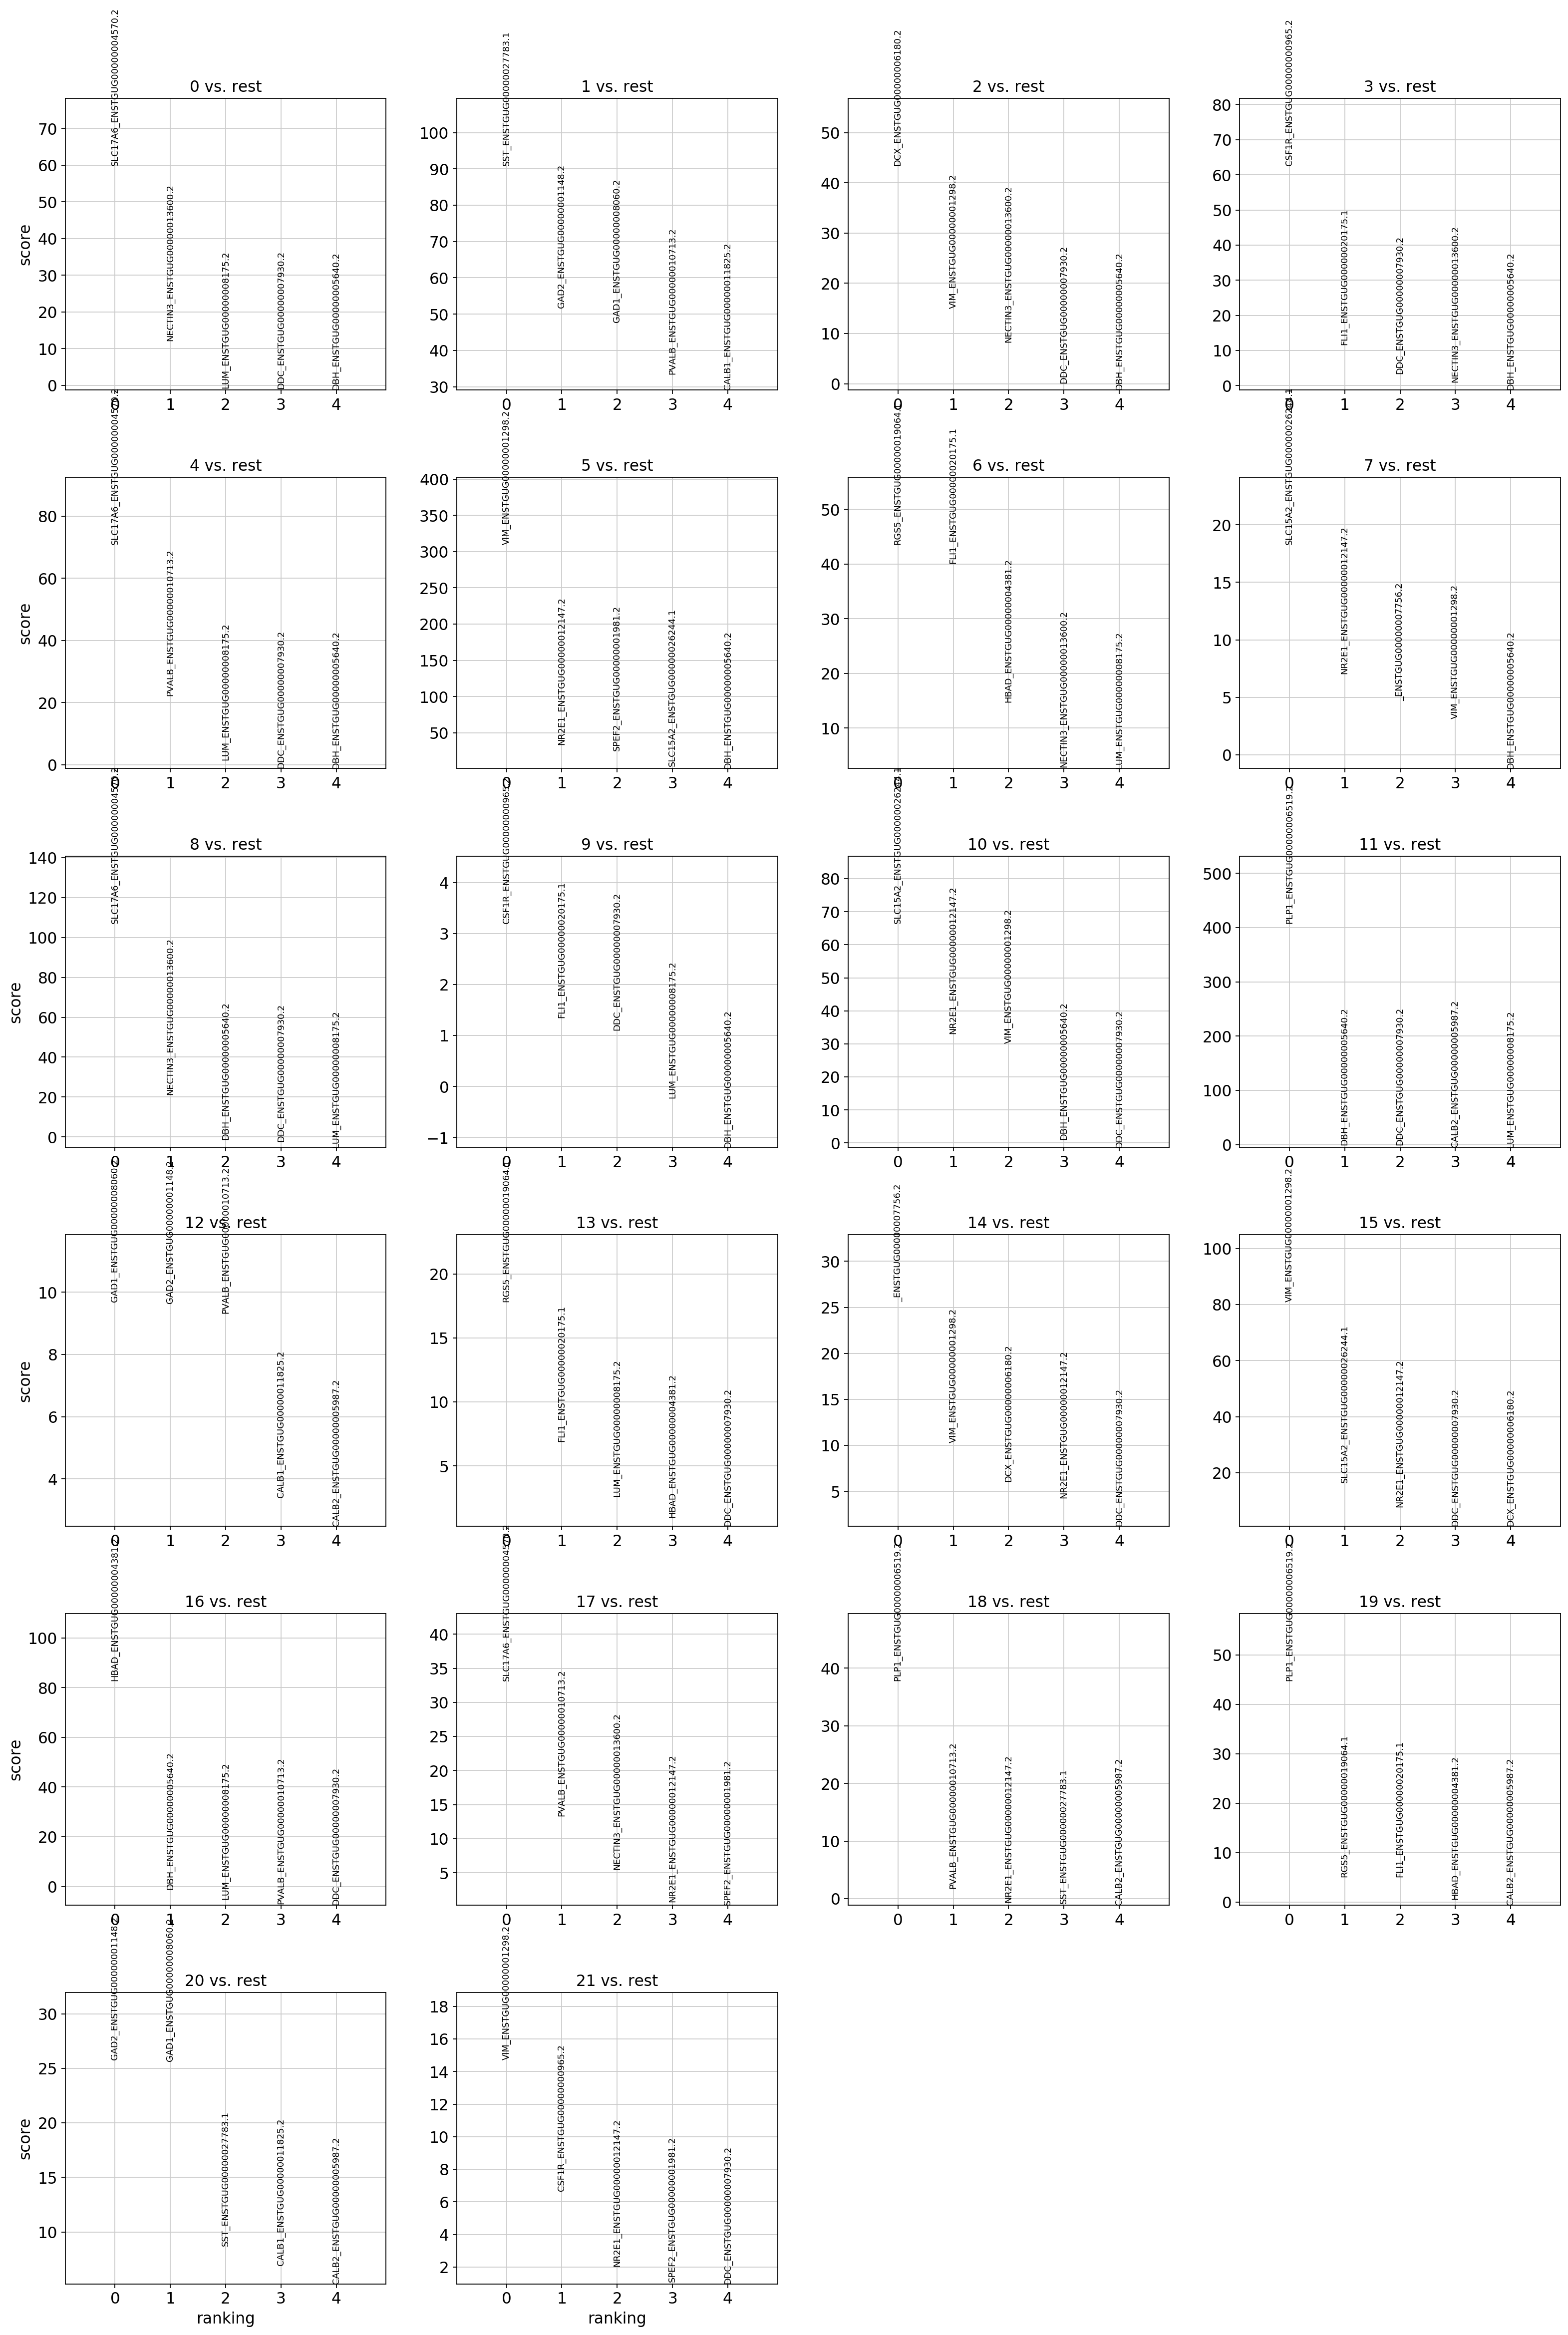

In [24]:
sc.pl.rank_genes_groups(adata_test, n_genes=5, sharey=False, save=False)

### Assign celltypes manually based on marker gene expression in each Leiden cluster

In [25]:
df_leiden = pd.DataFrame()
df_leiden["cluster"] = np.arange(22)
df_leiden["celltype"] = [
    "glutamatergic neurons 1",
    "GABAergic neurons 1",
    "migrating neuroblasts",
    "microglia 1",
    "glutamatergic neurons 2",
    "radial glia 1",
    "mural / vascular endothelial cells 1",
    "astrocytes 1",
    "glutamatergic neurons 3",
    "microglia 2",
    "astrocytes 2",
    "oligodendrocytes 1",
    "GABAergic neurons 2",
    "mural cells 2",
    "oligodendrocyte precursor cells",
    "radial glia 2",
    "red blood cells",
    "glutamatergic neurons 4",
    "oligodendrocytes 2",
    "oligodendrocytes 3",
    "GABAergic neurons 3",
    "microglia 3 / radial glia"
]

df_leiden

cluster                              celltype
0         0               glutamatergic neurons 1
1         1                   GABAergic neurons 1
2         2                 migrating neuroblasts
3         3                           microglia 1
4         4               glutamatergic neurons 2
5         5                         radial glia 1
6         6  mural / vascular endothelial cells 1
7         7                          astrocytes 1
8         8               glutamatergic neurons 3
9         9                           microglia 2
10       10                          astrocytes 2
11       11                    oligodendrocytes 1
12       12                   GABAergic neurons 2
13       13                         mural cells 2
14       14       oligodendrocyte precursor cells
15       15                         radial glia 2
16       16                       red blood cells
17       17               glutamatergic neurons 4
18       18                    oligodendrocytes 2
19       19                    oligodendrocytes 3
20       20                   GABAergic neurons 3
21       21             microglia 3 / radial glia

___

# Add manually defined celltypes to AnnData object

In [26]:
# Create copy of leiden cluster column to store manually assigned celltypes
adata.obs["celltype"] = adata.obs.leiden.copy()

In [27]:
# Relabel the clusters in celltype
adata.rename_categories("celltype", df_leiden["celltype"].values)

In [28]:
adata.obs.head()

species     batch  n_counts_processed batch_index  \
barcode                                                                    
AAACCCAAGCACTGGA-0  zebrafinch  control1          483.000000           0   
AAACCCAAGCGTCAAG-0  zebrafinch  control1          946.000061           0   
AAACCCAAGGTCACAG-0  zebrafinch  control1         1068.000000           0   
AAACCCAAGTCATTGC-0  zebrafinch  control1         1407.000000           0   
AAACCCAAGTGCTACT-0  zebrafinch  control1         1060.000000           0   

                    n_counts_raw leiden             celltype  
barcode                                                       
AAACCCAAGCACTGGA-0    483.000000     13        mural cells 2  
AAACCCAAGCGTCAAG-0    946.000061      3          microglia 1  
AAACCCAAGGTCACAG-0   1068.000000      1  GABAergic neurons 1  
AAACCCAAGTCATTGC-0   1407.000000     10         astrocytes 2  
AAACCCAAGTGCTACT-0   1060.000000      1  GABAergic neurons 1

___

# Celltype stats

Show number of cells for each celltype:

In [29]:
df_leiden["total number of cells"] = adata.obs.groupby("leiden").size().values.astype(int)
df_leiden = df_leiden.sort_values(["celltype"])

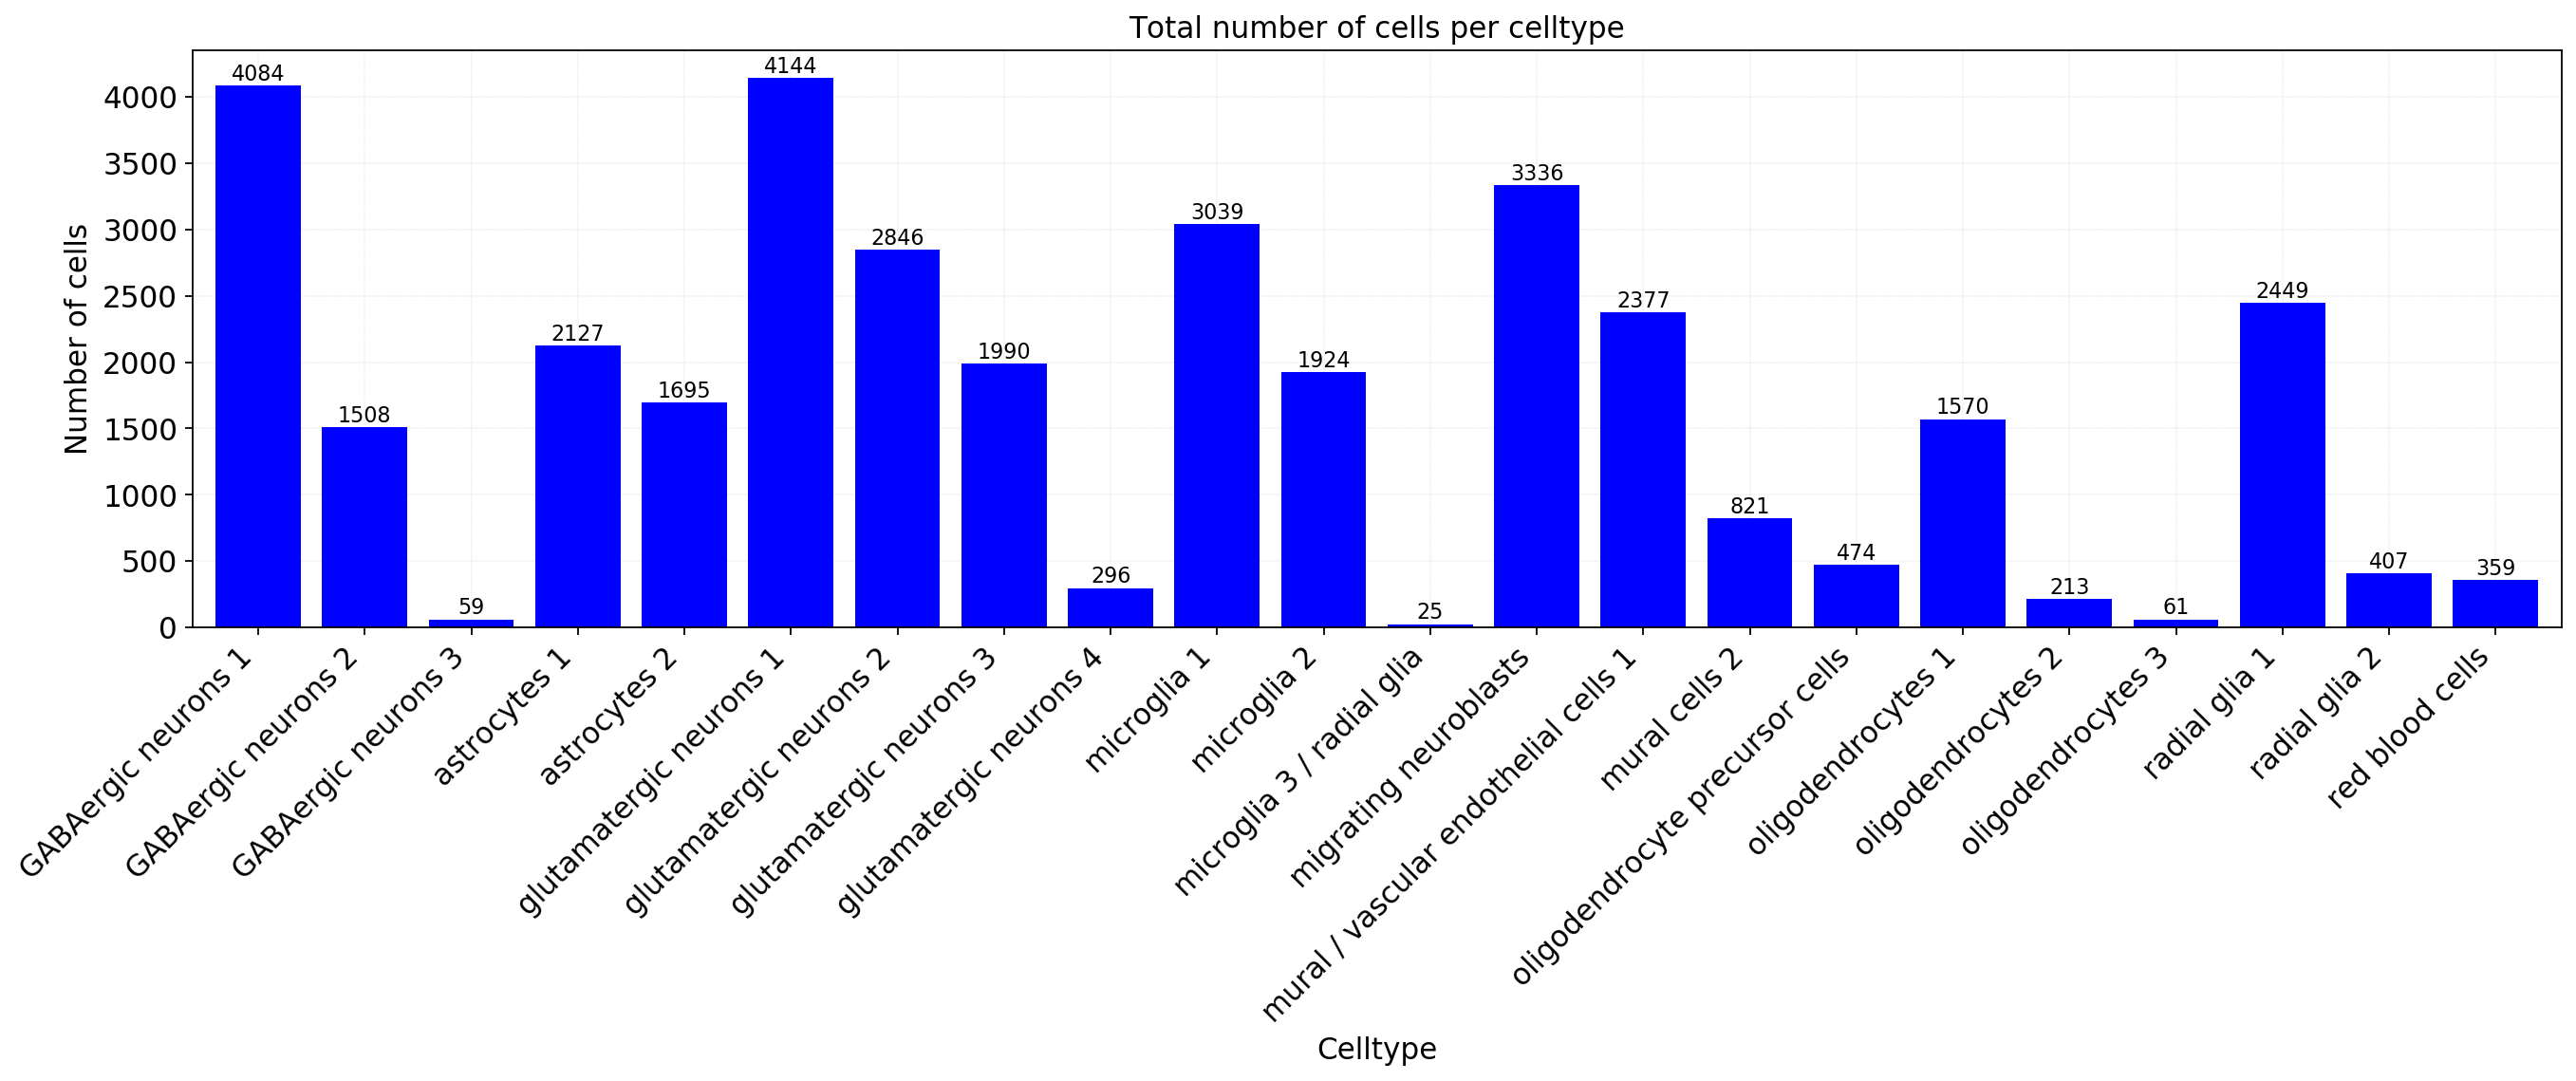

In [30]:
fig, ax = plt.subplots(figsize=(20,5))

clusters = df_leiden["celltype"].values
values = df_leiden["total number of cells"].values

ax.bar(clusters, values, color="blue")

# Add value above each bar
for index, value in enumerate(values):
    ax.text(x = index, y = value + 40, s = value, size = 10, ha='center')

ax.set_xticklabels(clusters, rotation = 45, ha="right")

ax.set(**{
    "title": "Total number of cells per celltype",
    "ylabel": "Number of cells",
    "xlabel": "Celltype"
})

ax.margins(x=0.01)
ax.grid(True, ls='--', lw=0.2)
ax.set_axisbelow(True)

fig.show()

### Plot UMAP with manually assigned celltypes:

In [31]:
# Desired order of the clusters
clusters = np.sort(df_leiden["celltype"].values)

# Reordering celltype labels using categorical data type
adata.obs["celltype"] = adata.obs["celltype"].cat.reorder_categories(list(clusters))

# Reordering leiden labels using categorical data type (so order is same as celltype labels)
adata.obs["leiden"] = adata.obs["leiden"].cat.reorder_categories(list(df_leiden["cluster"].values.astype(str)))

In [32]:
# Define cluster colors
palette = [
    "crimson",
    "orangered",
    "coral",
    "darkblue",
    "cornflowerblue",
    "darkgreen",
    "seagreen",
    "mediumseagreen",
    "yellowgreen",
    "indigo", 
    "mediumpurple",
    "slateblue",
    "hotpink",
    "teal",
    "mediumturquoise",
    "moccasin",
    "darkorange",
    "gold",
    "wheat",
    "mediumvioletred",
    "orchid",
    "firebrick",
]

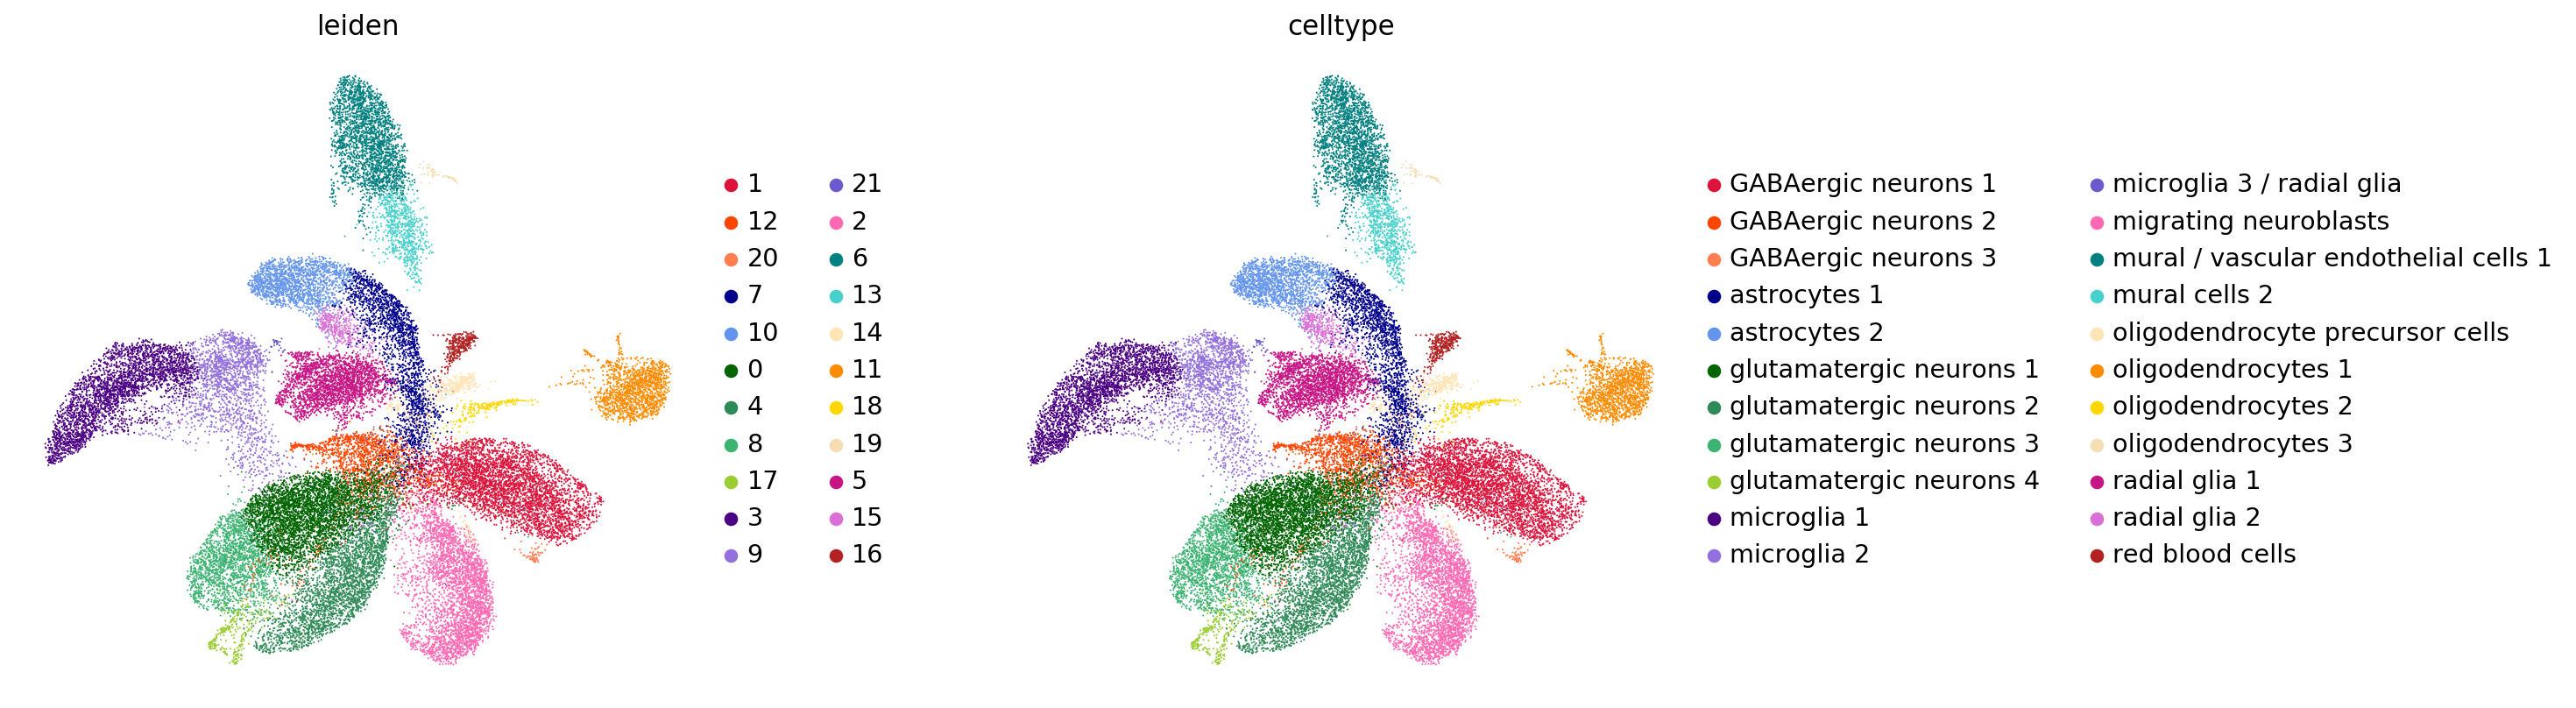

In [33]:
# Plot UMAP and color by Leiden clusters and batch
sc.pl.umap(adata, 
           color=["leiden", "celltype"],
           palette=palette,
           wspace=0.3,
#            arrows=True,
#            projection="3d"
          ) 

___

# Compare manual celltype assignment to celltype assignment based on mean gene expression of the predefined markers

Define hierarchical categories:

In [34]:
# compdict = {
#     "celltype_mean": [
#         "astrocytes",
#         "ependymal cells",
#         "oligodendrocytes",
#         "microglia",
#         "radial glia",
#         "vascular endothelial cells",
#         "mural cells",
#         "red blood cells",
#         "leptomeningeal cells",
#         "glutamatergic neurons",
#         "GABAergic neurons",
#         "dopaminergic neurons",
#         "noradrenergic neurons",
#         "GABAergic neuroblast",
#         "adult neural stem cells",
#         "migrating neuroblasts",
#     ]
# }

No need to compare to "other" here (like in CellAssign). Within each category, every cell for which the marker gene score is < threshold will be assigned the celltype "other".

### Define score threshold:  
Only cells with a score above this threshold for the markergenes will be assigned to the celltype.

This threshold is defined such that the resulting celltype assignment complies with the following priors:
1. All WRE positive neurons in the experiment batches are GABAergic (WRE is controlled by the dlx promoter in these birds)
2. All HVC-X and HVC-RA neurons are glutamatergic
3. There should be no RA cells, since the area dissected for scseq contained only HVC confirmed by GFP expression


In [35]:
# threshold = 0.5

### Calculate the average gene expression of the markergenes for each celltype - manual
Scanpy.tl.score_genes takes the average expression of a set of marker genes but then subtracts it by the average expression of a set of randomly chosen genes.  
Wouldn’t it be better to just take the average expression of the marker genes, especially if the data is already normalized?  
Because if this algorithm by chance uses a set of very highly expressed genes to substract for one cell but not the other, the results will be very different.  
Let's compare average expression with (scanpy) and without (manual) substraction.

Define function to calculate mean expression of list of marker genes:

In [36]:
# def marker_gene_expression(adata, marker_list):
#     """
#     A function go get the mean expression of marker genes.
#     # 
#     # Inputs:
#     #    adata           - An AnnData object containing the data set
#     #    marker_list     - A list of genes. These should be identical to the format in adata.var_names.
#     """
#     gene_ids = adata.var_names

#     marker_exp = []

#     for gene in marker_list:
#         # Check if gene occurs in adata.var_names
#         ens_idx = np.isin(gene_ids, gene)

#         if np.sum(ens_idx) == 0:
#             print("{} not found in adata.var_names".format(gene))
#             continue
#         else:
#             # Get a list of expression values for each marker gene for this cell
#             marker_exp.append(adata.X[:,ens_idx].mean(1))

#     # Calculate the mean expression across all marker genes for this cell
#     marker_exp_total = np.array(marker_exp).mean(0)

#     return marker_exp_total

Compute mean gene expression of marker genes for each category using the function above. Assign (cell)type if the mean expression is higher than the threshold. The highest score and (cell)type assignment are added to adata.obs in separate columns. If the scores for all (cell)types are < threshold, the assignment will be set to "other" and the score will be set to 0.

In [37]:
# # Ignore Python warnings so the cell below runs without spamming the whole notebook
# import warnings
# warnings.filterwarnings('ignore')

Assign scores and (cell)type for each comparison:

In [38]:
# for key in compdict:
#     # Create NaN columns in adata obs to record (cell)types and scores to
#     adata.obs["{}_score".format(key)] = np.nan
#     adata.obs["{}".format(key)] = "NaN"
    
#     # Create dataframe to record the scores for each (cell)type for each cell
#     df = pd.DataFrame(index=adata.obs.index)
    
#     for celltype in compdict[key]:
#         # Find indices (genes) belonging to nonzero occurances in the dataframe per (cell)type
#         genes = marker_gene_mat.index[[np.nonzero(np.array(marker_gene_mat[celltype].values))]][0]
        
#         # Compute mean expression of all marker genes for this (cell)type using the function defined above
#         marker_exp_total = marker_gene_expression(adata, genes)

#         df["{}".format(celltype)] = marker_exp_total 

# #     print(df)

#     # Assign (cell)type based on highest score. If all scores < threshold, the assignment will be "other" and the score will be set to 0
#     for index, barcode in enumerate(df.index.values):
#         if all(i < threshold for i in df.iloc[index].values):
#             # If all scores are below the threshold, assign "other" and set score to 0
#             adata.obs["{}_score".format(key)][index] = 0
#             adata.obs["{}".format(key)][index] = "other"
#         else:
#             # Record highest score
#             adata.obs["{}_score".format(key)][index] = df.iloc[index].values.max()
#             # Record (cell)type with highest score from column name
#             adata.obs["{}".format(key)][index] = df.columns[(df == df.iloc[index].values.max()).iloc[index]][0]

In [39]:
# # Print adata.obs after manually assigning (cell)types and scores based on mean gene expression
# adata.obs

In [40]:
# for key in compdict:
#     sc.pl.umap(
#         adata,
#         color=["{}".format(key), "celltype"],
#         title="{}".format(key),
#         ncols=1
#     )

Celltype assignment based on mean expression of markergenes confirms assignment of celltypes in Leiden clusters.

___

# Heatmaps showing expression of known marker genes per celltype 

In [41]:
# Define markers in order of celltypes
markers = [
    "GAD1_ENSTGUG00000008060.2",
    "GAD2_ENSTGUG00000001148.2",
    "SST_ENSTGUG00000027783.1",
    "PVALB_ENSTGUG00000010713.2",
    "CALB1_ENSTGUG00000011825.2",
    "CALB2_ENSTGUG00000005987.2",
    "SLC15A2_ENSTGUG00000026244.1",
    "SLC17A6_ENSTGUG00000004570.2",
    "CSF1R_ENSTGUG00000000965.2",
    "DCX_ENSTGUG00000006180.2",
    "RGS5_ENSTGUG00000019064.1",
    "FLI1_ENSTGUG00000020175.1",
    "_ENSTGUG00000007756.2",
    "PLP1_ENSTGUG00000006519.2",
    "VIM_ENSTGUG00000001298.2",
    "HBAD_ENSTGUG00000004381.2",
#         "SPEF2_ENSTGUG00000001981.2",
#         "LUM_ENSTGUG00000008175.2",
#         "DDC_ENSTGUG00000007930.2",
#         "DBH_ENSTGUG00000005640.2",
#         "NR2E1_ENSTGUG00000012147.2",
#         "NECTIN3_ENSTGUG00000013600.2",
]

# Define marker groups
var_groups = [
    (0, 5),
    (6, 6),
    (7, 7),
    (8, 8),
    (9, 9),
    (10, 10),
    (11, 11),
    (12, 12),
    (13, 13),
    (14, 14),
    (15, 15)
]

# Define marker group labels
var_labels = [
    "GABAergic neurons",
    "astrocytes",
    "glutamatergic neurons",
    "microglia",
    "migrating neuroblasts",
    "mural cells",
    "vascular endothelial cells",
    "oligodendrocyte precursor cells",
    "oligodendrocytes",
    "radial glia",
    "red blood cells",
    #     "ependymal cells",
    #     "leptomeningeal cells",
    #     "dopaminergic neurons",
    #     "noradrenergic neurons",
    #     "adult neural stem cells",
    #     "GABAergic neuroblast",
]

Heatmap showing expression of previously known marker genes:

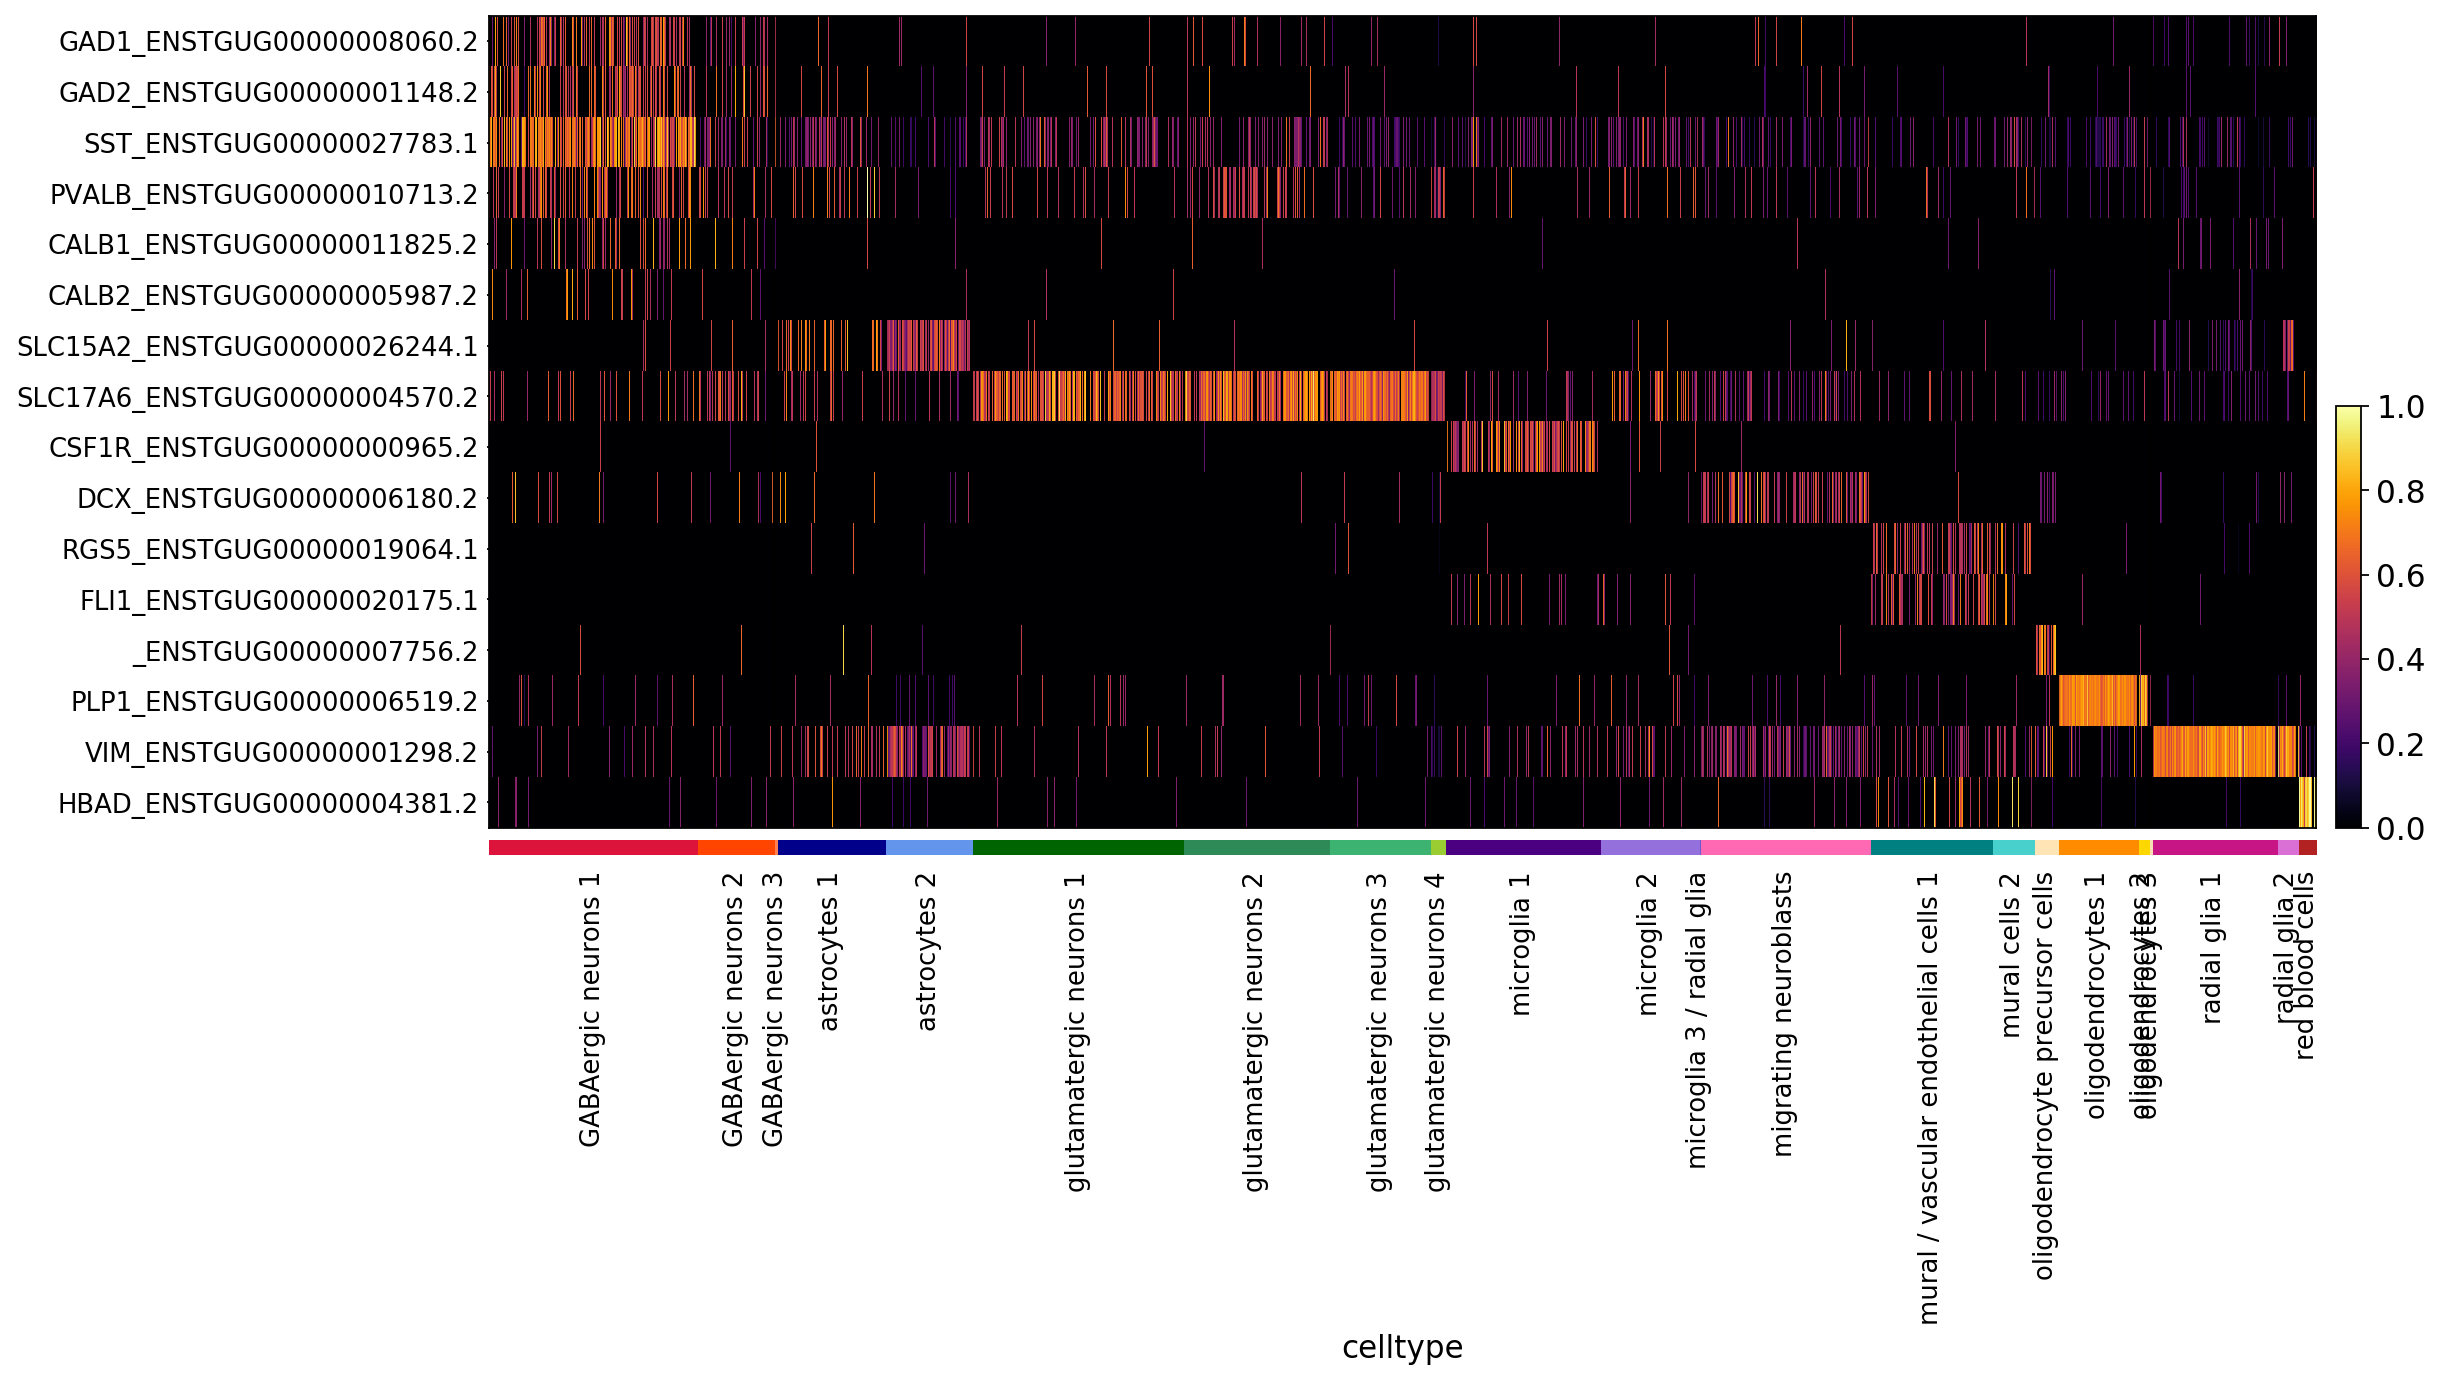

In [46]:
sc.pl.heatmap(
    adata,
    markers,
    groupby="celltype",
#     dendrogram=True, # This messes up the ordering of the celltypes
    show_gene_labels=True,
#     var_group_positions=var_groups,
#     var_group_labels=var_labels,
#     var_group_rotation=1,
    use_raw=False, # By default adata.raw.X is plotted. If use_raw=False is set, then adata.X is plotted. 
    cmap="inferno", # Alternative cmap: magma
    standard_scale="var", # standardize that dimension between 0 and 1, meaning for each variable or observation, subtract the minimum and divide each by its maximum
    swap_axes=True,
    figsize=(15, 7)
)

### Marker for large GABAergic neurons in HVC

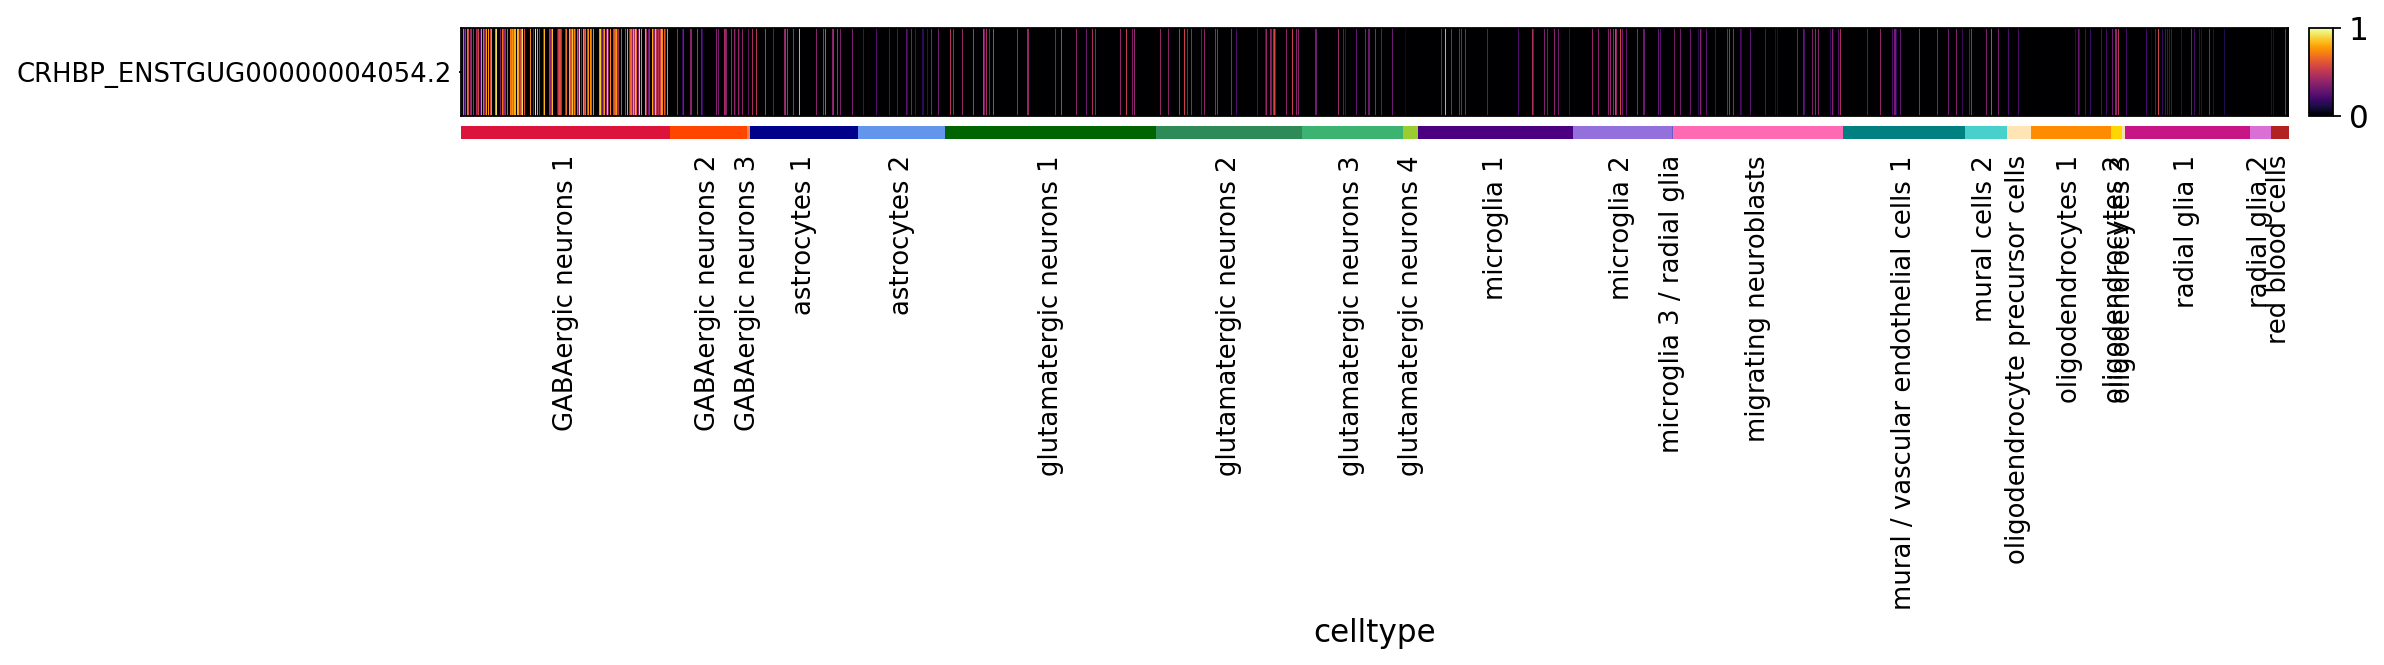

In [50]:
sc.pl.heatmap(
    adata,
    "CRHBP_ENSTGUG00000004054.2",
    groupby="celltype",
#     dendrogram=True, # This messes up the ordering of the celltypes
    show_gene_labels=True,
#     var_group_positions=var_groups,
#     var_group_labels=var_labels,
#     var_group_rotation=1,
    use_raw=False, # By default adata.raw.X is plotted. If use_raw=False is set, then adata.X is plotted. 
    cmap="inferno", # Alternative cmap: magma
    standard_scale="var", # standardize that dimension between 0 and 1, meaning for each variable or observation, subtract the minimum and divide each by its maximum
    swap_axes=True,
    figsize=(15, 1)
)

Heatmap showing DE genes per celltype:

In [47]:
# Get first 5 DE genes for each Leiden cluster while making sure that cluster order is same as celltype order and remove duplications
l_markers = pd.unique(leiden_markers[df_leiden["cluster"].values.astype(str)].head(5).values.ravel('K')) #.ravel('K') makes sure that the values for each columns stay together instead of going per row

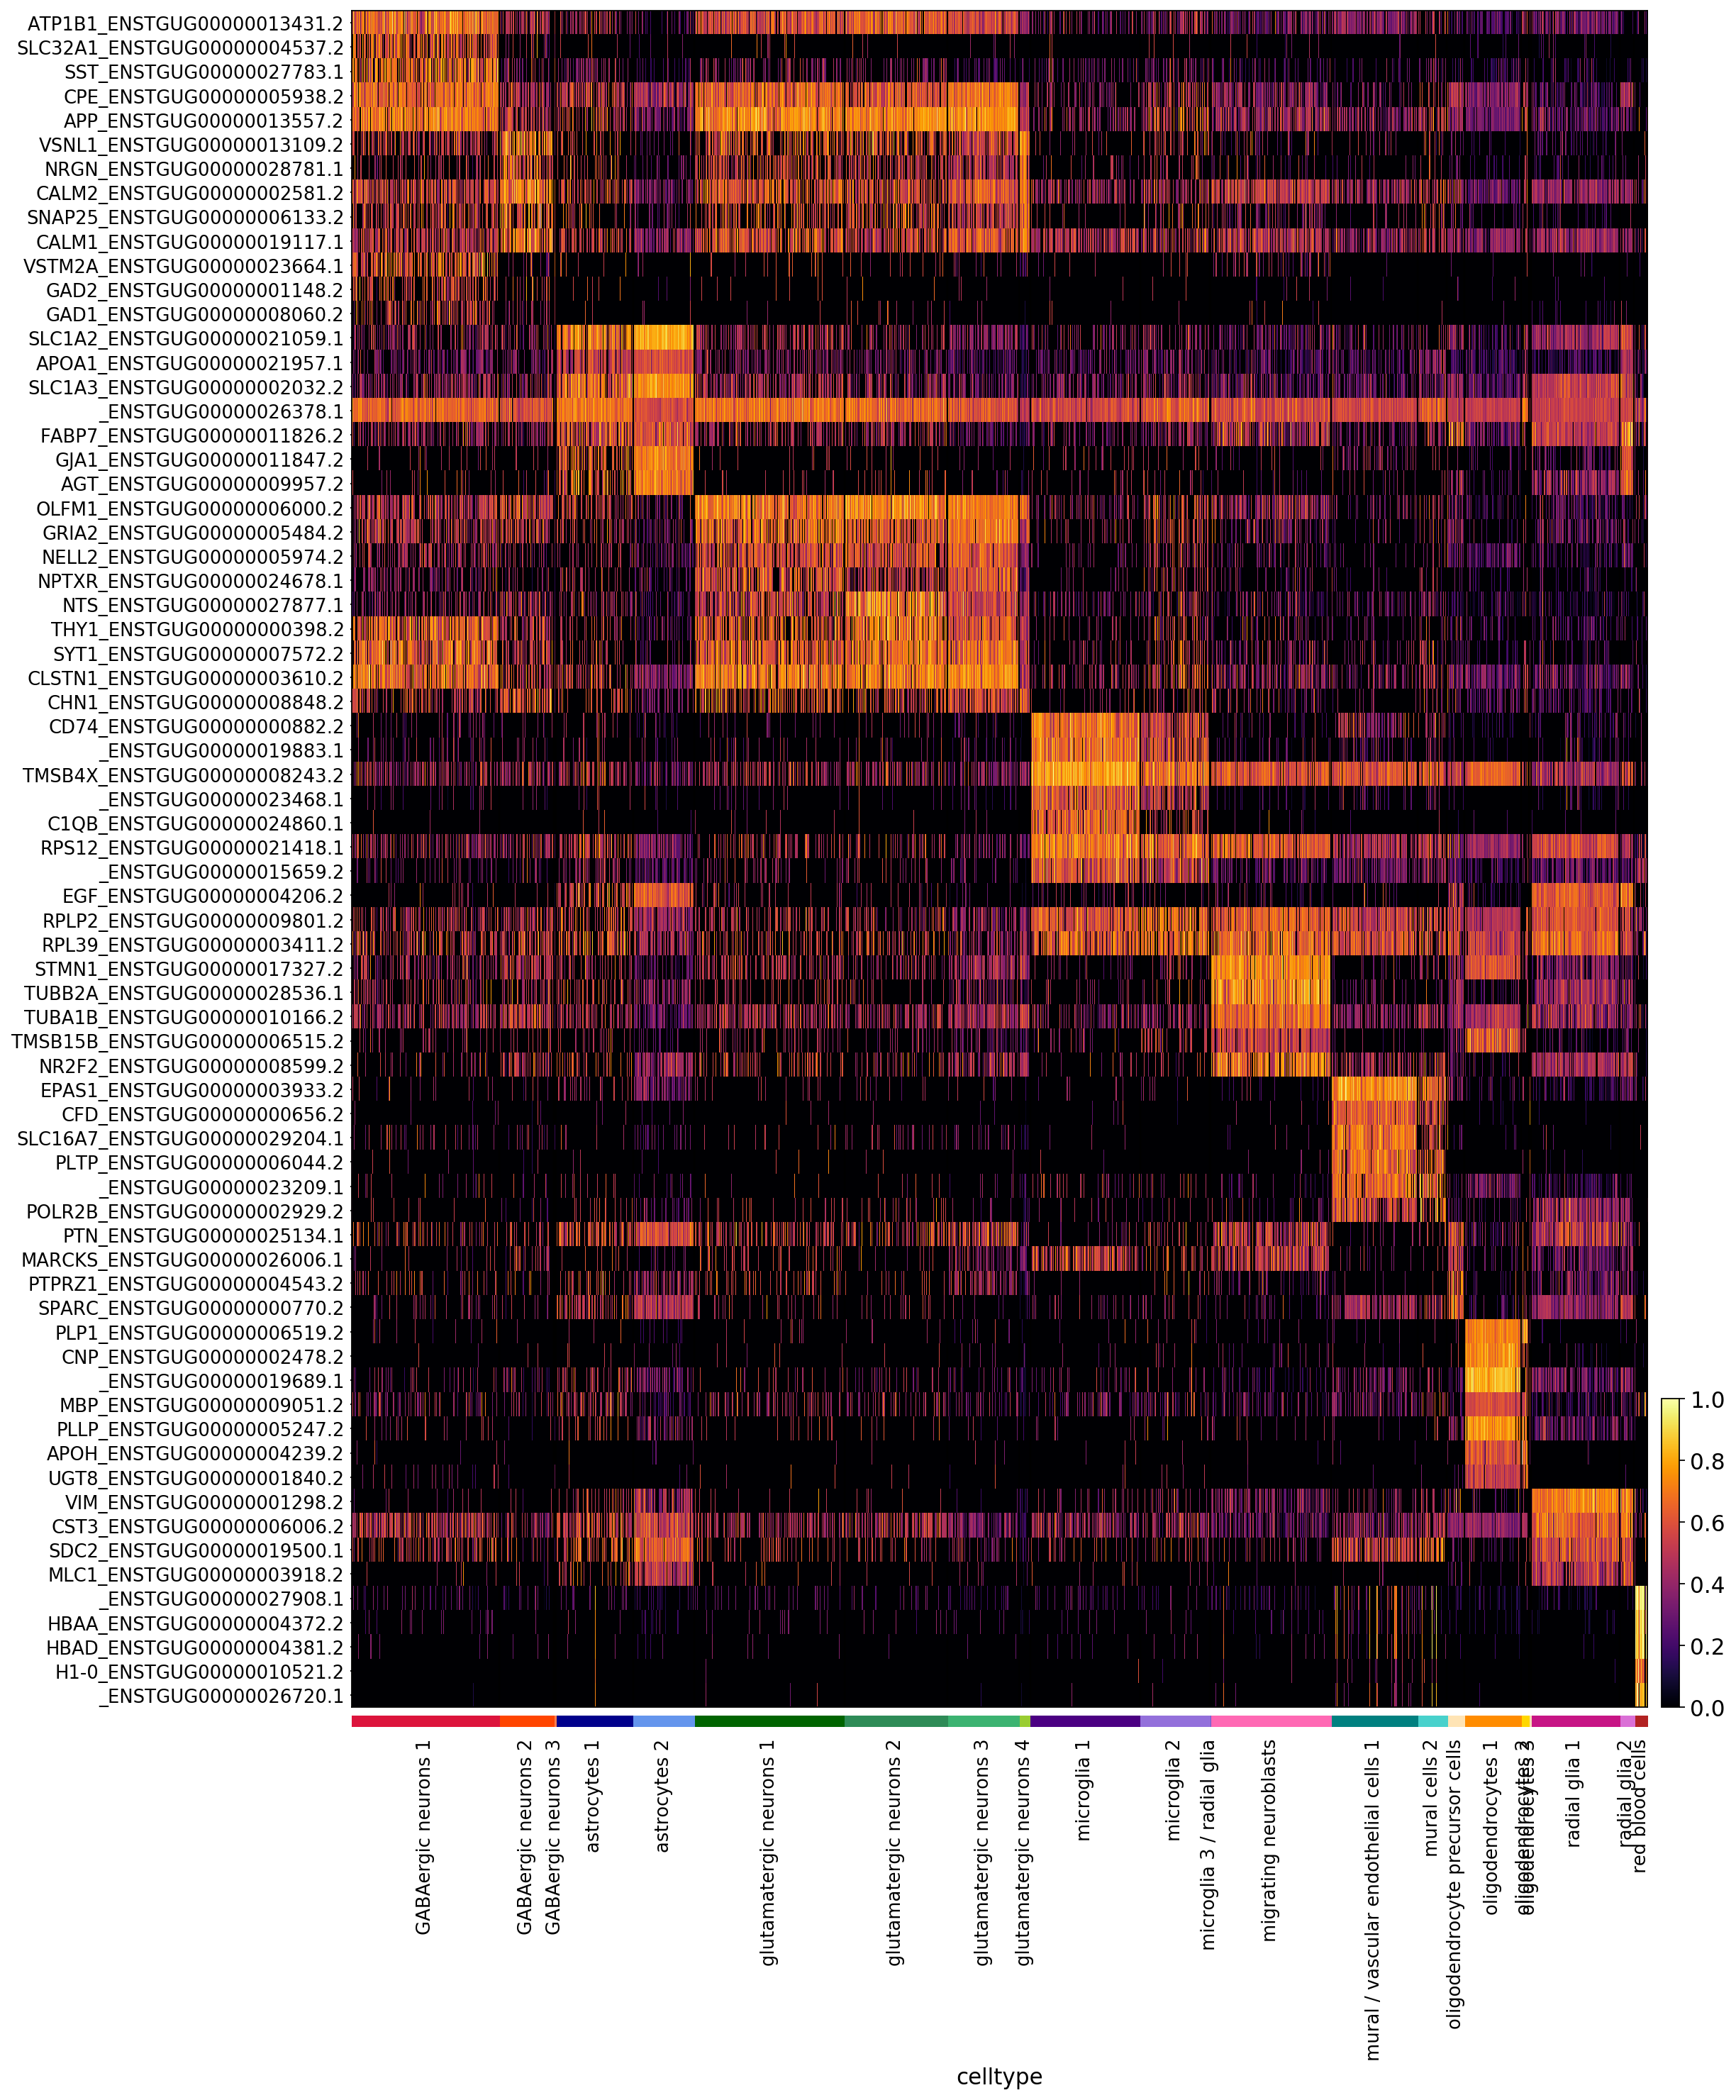

In [48]:
sc.pl.heatmap(
    adata,
    l_markers,
    groupby="celltype",
#     dendrogram=True, # This messes up the ordering of the celltypes
    show_gene_labels=True,
#     var_group_positions=var_groups,
#     var_group_labels=var_labels,
#     var_group_rotation=1,
    use_raw=False, # By default adata.raw.X is plotted. If use_raw=False is set, then adata.X is plotted. 
    cmap="inferno", # Alternative cmap: magma
    standard_scale="var", # standardize that dimension between 0 and 1, meaning for each variable or observation, subtract the minimum and divide each by its maximum
    swap_axes=True,
    figsize=(15, 20),
    save=False
)

ENSTGUG00000015659 = Ferritin, higher subunit  
ENSTGUG00000019689 = Glutathione S-transferase-like    
ENSTGUG00000019883 = Class II histocompatibility antigen, B-L beta chain-like  
ENSTGUG00000023209 = Aldo-keto reductase family 1 member B1-like  
ENSTGUG00000023468 = novel gene  
ENSTGUG00000026378 = novel gene  
ENSTGUG00000026720 = novel gene  
ENSTGUG00000027908 = Hemoglobin subunit rho  

___

# Assign connectivity (HVC-X / HVC-RA) to glutamatergic neurons

In [368]:
# Drop categories that I do not need for this analysis
conn_mat = marker_gene_mat.filter(["HVC-RA", "HVC-X"], axis=1)
# Drop rows of genes containing only 0s
conn_mat = conn_mat.loc[(conn_mat!=0).any(axis=1)]
conn_mat

HVC-RA  HVC-X
gene_name_id                               
UTS2B_ENSTGUG00000009278.2         1      0
HPCAL1_ENSTGUG00000013044.2        1      0
DCN_ENSTGUG00000008178.2           0      1
NTS_ENSTGUG00000027877.1           0      1
ALDH1A2_ENSTGUG00000006178.2       0      1
FNDC9_ENSTGUG00000000654.2         0      1

In [369]:
# Find indices of all marker genes in adata
ens_idx = np.isin(adata.var_names, conn_mat.index.values)

# Slice adata based on these indices
adata_conn = adata[:,ens_idx].copy()

# Remove all celltypes but glutamatergic neurons
adata_conn = adata_conn[np.char.startswith(nd(adata_conn.obs.celltype.values).astype(str), "glutamatergic neurons")]

adata_conn

View of AnnData object with n_obs × n_vars = 9276 × 6
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden', 'celltype'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'rank_genes_groups', 'celltype_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [370]:
sc.tl.rank_genes_groups(adata_conn, groupby='celltype', method='t-test', corr_method="bonferroni", use_raw=False)

Trying to set attribute `.uns` of view, copying.


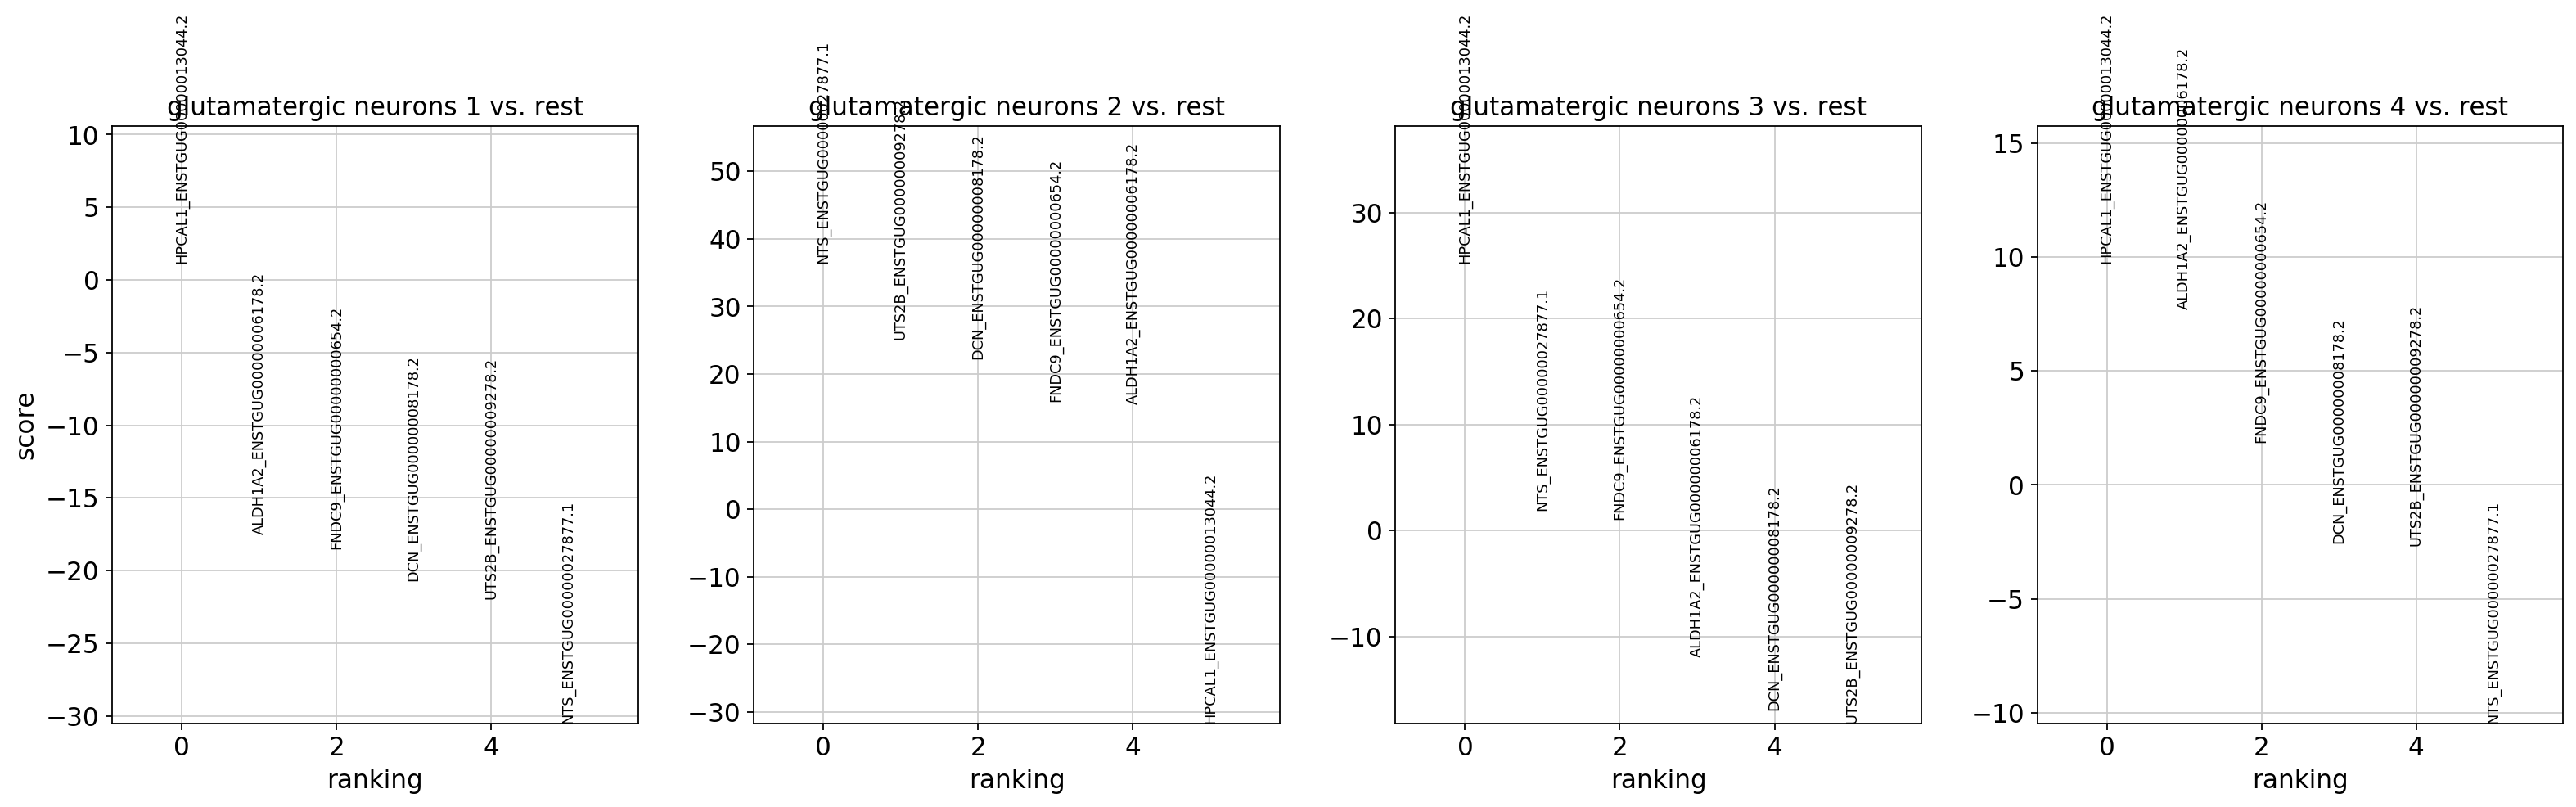

In [371]:
sc.pl.rank_genes_groups(adata_conn, n_genes=6, sharey=False, save=False, ncols=5)

Add assigned connectivity to adata.obs:

In [372]:
# Create copy of leiden cluster column to store manually assigned connectivity
adata.obs["connectivity"] = adata.obs.celltype.copy()

In [373]:
celltypes = nd(adata.obs.celltype.unique())
celltypes

df_connectivity = pd.DataFrame()
df_connectivity["celltypes"] = celltypes
# Using a range of numbers here, otherwise therename_categories function will not work
df_connectivity["connectivity"] = np.arange(len(celltypes))

# Assign connectivity
df_connectivity["connectivity"][df_connectivity["celltypes"]=="glutamatergic neurons 1"] = "undefined 1"
df_connectivity["connectivity"][df_connectivity["celltypes"]=="glutamatergic neurons 2"] = "HVC-X / HVC-RA"
df_connectivity["connectivity"][df_connectivity["celltypes"]=="glutamatergic neurons 3"] = "undefined 2"
df_connectivity["connectivity"][df_connectivity["celltypes"]=="glutamatergic neurons 4"] = "undefined 3"

# Sort by celltypes (otherwise rename categories does not work correctly)
df_connectivity = df_connectivity.sort_values("celltypes")
df_connectivity

/home/lauraluebbert/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


celltypes    connectivity
2                    GABAergic neurons 1               2
10                   GABAergic neurons 2              10
20                   GABAergic neurons 3              20
4                           astrocytes 1               4
3                           astrocytes 2               3
8                glutamatergic neurons 1     undefined 1
11               glutamatergic neurons 2  HVC-X / HVC-RA
7                glutamatergic neurons 3     undefined 2
18               glutamatergic neurons 4     undefined 3
1                            microglia 1               1
15                           microglia 2              15
21             microglia 3 / radial glia              21
9                  migrating neuroblasts               9
6   mural / vascular endothelial cells 1               6
0                          mural cells 2               0
13       oligodendrocyte precursor cells              13
16                    oligodendrocytes 1              16
14                    oligodendrocytes 2              14
19                    oligodendrocytes 3              19
12                         radial glia 1              12
17                         radial glia 2              17
5                        red blood cells               5

In [374]:
adata.rename_categories("connectivity", df_connectivity["connectivity"].values)

In [375]:
adata.obs.head()

species     batch  n_counts_processed batch_index  \
barcode                                                                    
AAACCCAAGCACTGGA-0  zebrafinch  control1          483.000000           0   
AAACCCAAGCGTCAAG-0  zebrafinch  control1          946.000061           0   
AAACCCAAGGTCACAG-0  zebrafinch  control1         1068.000000           0   
AAACCCAAGTCATTGC-0  zebrafinch  control1         1407.000000           0   
AAACCCAAGTGCTACT-0  zebrafinch  control1         1060.000000           0   

                    n_counts_raw leiden             celltype connectivity  
barcode                                                                    
AAACCCAAGCACTGGA-0    483.000000     13        mural cells 2            0  
AAACCCAAGCGTCAAG-0    946.000061      3          microglia 1            1  
AAACCCAAGGTCACAG-0   1068.000000      1  GABAergic neurons 1            2  
AAACCCAAGTCATTGC-0   1407.000000     10         astrocytes 2            3  
AAACCCAAGTGCTACT-0   1060.000000      1  GABAergic neurons 1            2

### Plot glutamatergic neuron connectivity assignment

In [376]:
# Desired order of the connectivity clusters
conn_clusters = ["HVC-X / HVC-RA", "undefined 1", "undefined 2", "undefined 3", 0, 1, 2, 3, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21]

# Reordering connectivity labels using categorical data type
adata.obs["connectivity"] = adata.obs["connectivity"].cat.reorder_categories(list(conn_clusters))

In [377]:
palette_glut = [
    "crimson",
    "indigo",
    "orchid",
    "pink"
]

All glut neurons for reference:

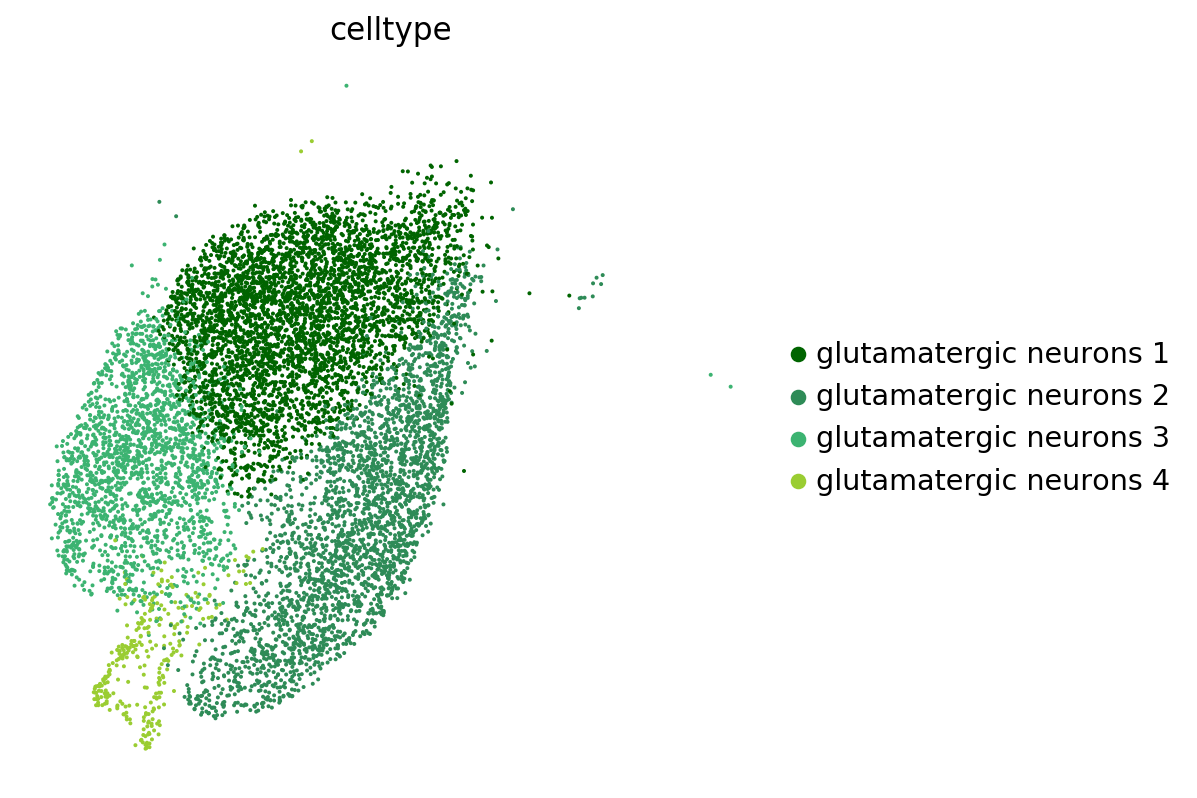

In [378]:
sc.pl.umap(
    adata[np.char.startswith(nd(adata.obs.celltype.values).astype(str), "glutamatergic neurons")],
    color=["celltype"],
    ncols=1
)

Connectivity:

Trying to set attribute `.uns` of view, copying.


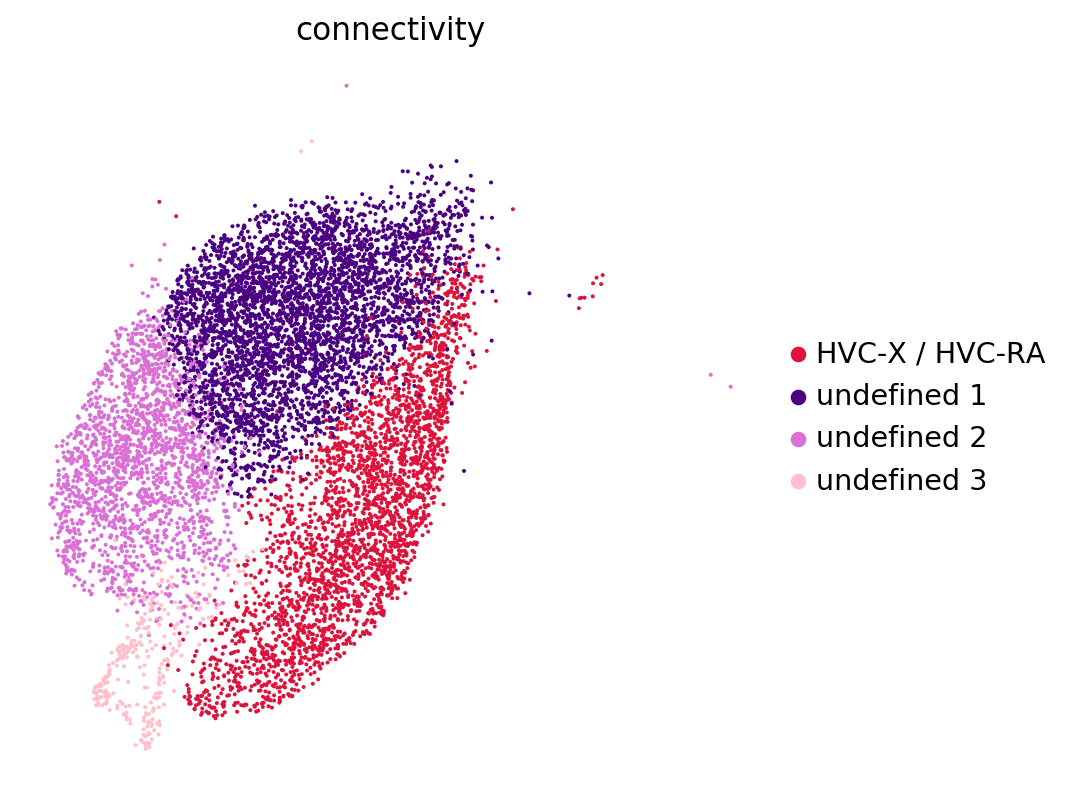

In [379]:
sc.pl.umap(
    adata[np.char.startswith(nd(adata.obs.celltype.values).astype(str), "glutamatergic neurons")],
    color=["connectivity"],
    palette=palette_glut,
    ncols=1
)

This assignment makes sense given that WRE is expressed mostly in WRE (see graph below of WRE expression). We do not know why AAVs target HVC-X more succesfully than HVC-RA neurons, but this coincides with what we previouly observed in the lab based on overlap between viral fluorophore expression and tracers from RA or from X.

In [380]:
markers = [
    "UTS2B_ENSTGUG00000009278.2",
    "HPCAL1_ENSTGUG00000013044.2",
    "ALDH1A2_ENSTGUG00000006178.2",
    "DCN_ENSTGUG00000008178.2",
    "FNDC9_ENSTGUG00000000654.2",
    "NTS_ENSTGUG00000027877.1",
    "SST_ENSTGUG00000027783.1",
    "PVALB_ENSTGUG00000010713.2",
    "CALB1_ENSTGUG00000011825.2",
    "CALB2_ENSTGUG00000005987.2",
    "BDNF_ENSTGUG00000004743.2",
    "FOSL2_ENSTGUG00000024611.1",
    "HOMER1_ENSTGUG00000003711.2",
    "ARC_ENSTGUG00000012727.2",
    "TNFAIP8L3_ENSTGUG00000028388.1",
    "EGR1_ENSTGUG00000000003.2",
]

Trying to set attribute `.uns` of view, copying.


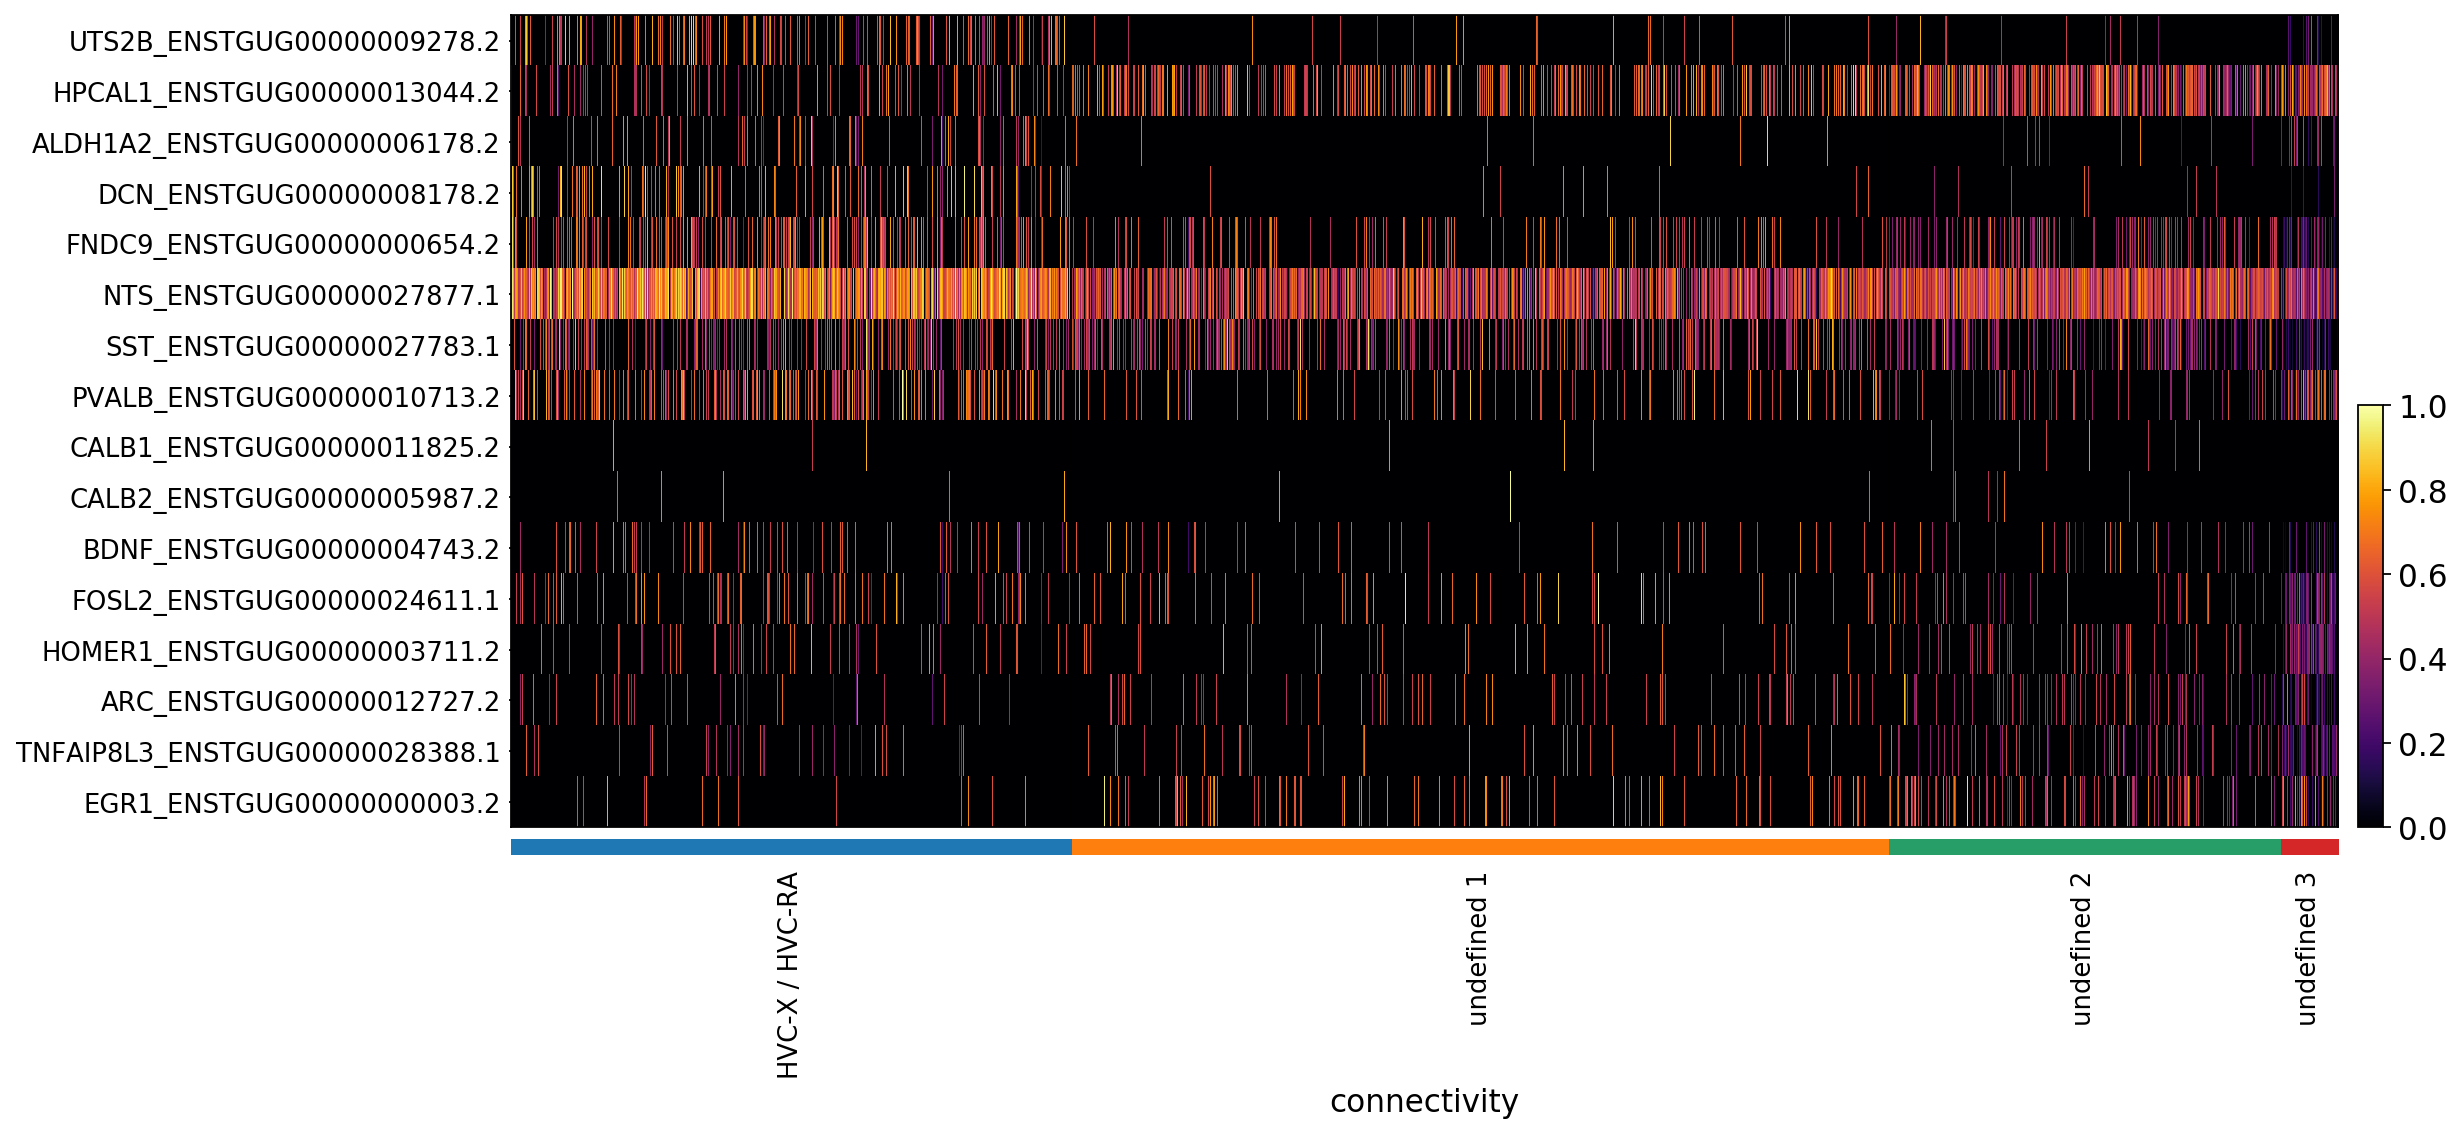

In [381]:
sc.pl.heatmap(
    adata[np.char.startswith(nd(adata.obs.celltype.values).astype(str), "glutamatergic neurons")],
    markers,
    groupby="connectivity",
    show_gene_labels=True,
    use_raw=False, # By default adata.raw.X is plotted. If use_raw=False is set, then adata.X is plotted. 
    cmap="inferno", # Alternative cmap: magma
    standard_scale="var", # standardize that dimension between 0 and 1, meaning for each variable or observation, subtract the minimum and divide each by its maximum
    swap_axes=True,
    figsize=(15, 7)
)

#### Since only glutamatergic neurons cluster 2 seems to express HVC-X / HVC-RA markers, I will recluster only that cluster (labeled "HVC-X / HVC-RA") to separate HVC-X and HVC-RA neurons in the cluster.

UTS2B (Urotensin 2B): Among its related pathways are Peptide ligand-binding receptors and Signaling by GPCR. Gene Ontology (GO) annotations related to this gene include hormone activity and G protein-coupled receptor binding.  

HPCAL1 (Hippocalcin Like 1): The protein encoded by this gene is a member of neuron-specific calcium-binding proteins family found in the retina and brain. It is highly similar to human hippocalcin protein and nearly identical to the rat and mouse hippocalcin like-1 proteins. It may be involved in the calcium-dependent regulation of rhodopsin phosphorylation and may be of relevance for neuronal signalling in the central nervous system.   

ALDH1A2 (Aldehyde Dehydrogenase 1 Family Member A2): This protein belongs to the aldehyde dehydrogenase family of proteins. The product of this gene is an enzyme that catalyzes the synthesis of retinoic acid (RA) from retinaldehyde. Retinoic acid, the active derivative of vitamin A (retinol), is a hormonal signaling molecule that functions in developing and adult tissues. The studies of a similar mouse gene suggest that this enzyme and the cytochrome CYP26A1, concurrently establish local embryonic retinoic acid levels which facilitate posterior organ development and prevent spina bifida.  

DCN (decorin): This gene encodes a member of the small leucine-rich proteoglycan family of proteins. Alternative splicing results in multiple transcript variants, at least one of which encodes a preproprotein that is proteolytically processed to generate the mature protein. This protein plays a role in collagen fibril assembly. Binding of this protein to multiple cell surface receptors mediates its role in tumor suppression, including a stimulatory effect on autophagy and inflammation and an inhibitory effect on angiogenesis and tumorigenesis.

FNDC9 (Fibronectin Type III Domain Containing 9): Fibronectin is a high-molecular weight glycoprotein of the extracellular matrix that binds to membrane-spanning receptor proteins called integrins (https://en.wikipedia.org/wiki/Fibronectin).

NTS (Neurotensin): This gene encodes a common precursor for two peptides, neuromedin N and neurotensin. Neurotensin is a secreted tridecapeptide, which is widely distributed throughout the central nervous system, and may function as a neurotransmitter or a neuromodulator. It may be involved in dopamine-associated pathophysiological events, in the maintenance of gut structure and function, and in the regulation of fat metabolism. Neurotensin also exhibits antimicrobial activity against bacteria and fungi. Tissue-specific processing may lead to the formation in some tissues of larger forms of neuromedin N and neurotensin. The large forms may represent more stable peptides that are also biologically active.

Info from GeneCards unless otherwise noted.

___

# Save adata with celltype assignment

In [382]:
# adata.obs["connectivity"] = adata.obs["connectivity"].astype(str)
# adata.write("../../finchseq_data/all_celltype.h5ad")

___